In [ ]:
#                                                                               Bird Species Observation Analysis

**Project Objective **

Analyze bird species observations from forest and grassland habitats to identify patterns in biodiversity, behavior, environmental impact, and conservation needs

**Approach Uesd**

1.  Data Collection & Cleaning

2.  Exploratory Data Analysis (EDA)

3. Data Visualization

4. Dashboard Creation (Power BI)

Columns in Dataset

1.	Admin_Unit_Code: The code for the administrative unit (e.g., "ANTI") where the observation was conducted.

2.	Sub_Unit_Code: The sub-unit within the administrative unit for further classification.

3.	Site_Name: The name of the specific observation site within the unit.

4.	Plot_Name: A unique identifier for the specific plot where observations were recorded.

5.	Location_Type: The habitat type of the observation area (e.g., "Forest").

6.	Year: The year in which the observation took place.

7.	Date: The exact date of the observation.

8.	Start_Time: The start time of the observation session.

9.	End_Time: The end time of the observation session.

10.	Observer: The individual who conducted the observation.

11.	Visit: The count of visits made to the same observation site or plot.

12.	Interval_Length: The duration of the observation interval (e.g., "0-2.5 min").

13.	ID_Method: The method used to identify the species (e.g., "Singing," "Calling," "Visualization").

14.	Distance: The distance of the observed species from the observer (e.g., "<= 50 Meters").

15.	Flyover_Observed: Indicates whether the bird was observed flying overhead (TRUE/FALSE).

16.	Sex: The sex of the observed bird (e.g., Male, Female, Undetermined).

17.	Common_Name: The common name of the observed bird species (e.g., "Eastern Towhee").

18.	Scientific_Name: The scientific name of the observed bird species (e.g., Pipilo erythrophthalmus).

19.	AcceptedTSN: The Taxonomic Serial Number for the observed species.

20.	NPSTaxonCode: A unique code assigned to the taxon of the species.

21.	AOU_Code: The American Ornithological Union code for the species.

22.	PIF_Watchlist_Status: Indicates whether the species is on the Partners in Flight Watchlist (e.g., "TRUE" for at-risk species).

23.	Regional_Stewardship_Status: Denotes the conservation priority within the region (TRUE/FALSE).

24.	Temperature: The temperature recorded at the time of observation (in degrees).

25.	Humidity: The humidity percentage recorded at the time of observation.

26.	Sky: The sky condition during the observation (e.g., "Cloudy/Overcast").

27.	Wind: The wind condition (e.g., "Calm (< 1 mph) smoke rises vertically").

28.	Disturbance: Notes any disturbances that could affect the observation (e.g., "No effect on count").

29.	Initial_Three_Min_Cnt: The count of the species observed in the first three minutes of the session.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Forest = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX')
Grassland = pd.read_excel('/content/drive/MyDrive/GRASSLAND.XLSX')

Forest Dataset

In [ ]:
Forest = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX')

Merging all sheets

In [ ]:
forest_sheet1_df = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX', sheet_name='ANTI')
forest_sheet2_df = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX', sheet_name='CATO')
forest_sheet3_df = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX', sheet_name='CHOH')
forest_sheet4_df = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX', sheet_name='GWMP')
forest_sheet5_df = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX', sheet_name='HAFE')
forest_sheet6_df = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX', sheet_name='MANA')
forest_sheet7_df = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX', sheet_name='MONO')
forest_sheet8_df = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX', sheet_name='NACE')
forest_sheet9_df = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX', sheet_name='PRWI')
forest_sheet10_df = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX', sheet_name='ROCR')
forest_sheet11_df = pd.read_excel('/content/drive/MyDrive/FOREST.XLSX', sheet_name='WOTR')

In [ ]:
xls = pd.ExcelFile('/content/drive/MyDrive/FOREST.XLSX')
print(xls.sheet_names)

['ANTI', 'CATO', 'CHOH', 'GWMP', 'HAFE', 'MANA', 'MONO', 'NACE', 'PRWI', 'ROCR', 'WOTR']


In [ ]:
forest_dataframes = [forest_sheet1_df,
                     forest_sheet2_df,
                     forest_sheet3_df,
                     forest_sheet4_df,
                     forest_sheet5_df,
                     forest_sheet6_df,
                     forest_sheet7_df,
                     forest_sheet8_df,
                     forest_sheet9_df,
                     forest_sheet10_df,
                     forest_sheet11_df]

# Concatenate all dataframes into a single dataframe
combined_forest_df = pd.concat(forest_dataframes, ignore_index=True)

# Display the head of the combined dataframe
print("Combined Forest Data:")

Combined Forest Data:


In [ ]:
combined_forest_df.head(5)

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,00-01-1900 06:19:00,00-01-1900 06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,00-01-1900 06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [ ]:
# Save the combined dataframe to a CSV file
combined_forest_df.to_csv('combined_forest_data.csv', index=False)

In [ ]:
combined_forest_df=pd.read_csv('/content/combined_forest_data.csv')

In [ ]:
combined_forest_df.head(5)

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,00-01-1900 06:19:00,00-01-1900 06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,00-01-1900 06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [ ]:
combined_forest_df.columns

Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name',
       'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer',
       'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed',
       'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt'],
      dtype='object')

In [ ]:
combined_forest_df.shape

(8546, 29)

In [ ]:
combined_forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Admin_Unit_Code              8546 non-null   object 
 1   Sub_Unit_Code                722 non-null    object 
 2   Site_Name                    8546 non-null   object 
 3   Plot_Name                    8546 non-null   object 
 4   Location_Type                8546 non-null   object 
 5   Year                         8546 non-null   int64  
 6   Date                         8546 non-null   object 
 7   Start_Time                   8546 non-null   object 
 8   End_Time                     8546 non-null   object 
 9   Observer                     8546 non-null   object 
 10  Visit                        8546 non-null   object 
 11  Interval_Length              8546 non-null   object 
 12  ID_Method                    8545 non-null   object 
 13  Distance          

In [ ]:
combined_forest_df.isnull().sum()

,0
Admin_Unit_Code,0
Sub_Unit_Code,7824
Site_Name,0
Plot_Name,0
Location_Type,0
Year,0
Date,0
Start_Time,0
End_Time,0
Observer,0


Data Cleaning

In [ ]:
# Fill Sub_Unit_Code fill with 'NA'
combined_forest_df['Sub_Unit_Code'].fillna('NA', inplace=True)

In [ ]:
# Drop 'ID_Method' row whete there is null
combined_forest_df.dropna(subset=['ID_Method'], inplace=True)

In [ ]:
mode_distance = combined_forest_df['Distance'].mode()[0]
combined_forest_df['Distance'].fillna(mode_distance, inplace=True)
print(combined_forest_df['Distance'].isnull().sum())

0


In [ ]:
# Sex column filled with "NA"
combined_forest_df['Sex'].fillna('NA', inplace=True)

In [ ]:
# AcceptedTSN filled with 'NA'
combined_forest_df['AcceptedTSN'].fillna('NA', inplace=True)

In [ ]:
combined_forest_df.isnull().sum()

,0
Admin_Unit_Code,0
Sub_Unit_Code,0
Site_Name,0
Plot_Name,0
Location_Type,0
Year,0
Date,0
Start_Time,0
End_Time,0
Observer,0


In [ ]:
combined_forest_df.head(5)

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,00-01-1900 06:19:00,00-01-1900 06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,00-01-1900 06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22 00:00:00,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [ ]:
# Convert the 'Date' column to datetime objects, coercing errors
combined_forest_df['Date'] = pd.to_datetime(combined_forest_df['Date'], errors='coerce')

# Format the 'Date' column to display only the date
combined_forest_df['Date'] = combined_forest_df['Date'].dt.date

# Display the updated dataframe
display(combined_forest_df.head())

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,00-01-1900 06:19:00,00-01-1900 06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,00-01-1900 06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [ ]:
# Remove '00-01-1900  ' from the 'Start_Time' column
combined_forest_df['Start_Time'] = combined_forest_df['Start_Time'].astype(str).str.replace('00-01-1900  ', '', regex=False)

# Display the updated dataframe
display(combined_forest_df.head())

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,00-01-1900 06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [ ]:
# Remove '00-01-1900  ' from the 'End_Time' column
combined_forest_df['End_Time'] = combined_forest_df['End_Time'].astype(str).str.replace('00-01-1900  ', '', regex=False)

# Display the updated dataframe
display(combined_forest_df.head())

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [ ]:
combined_forest_df.head(5)

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [ ]:
combined_forest_df.shape

(8545, 29)

Data Visualization

Univariate Analyssis - Forest Dataset

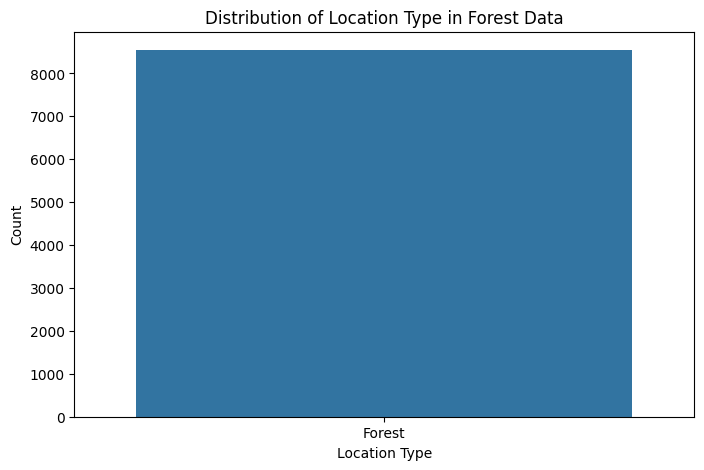

In [ ]:
# Distribution of Location_Type (should be all Forest)
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_forest_df, x='Location_Type')
plt.title('Distribution of Location Type in Forest Data')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

There is only one 'Location Type' that is "Forest

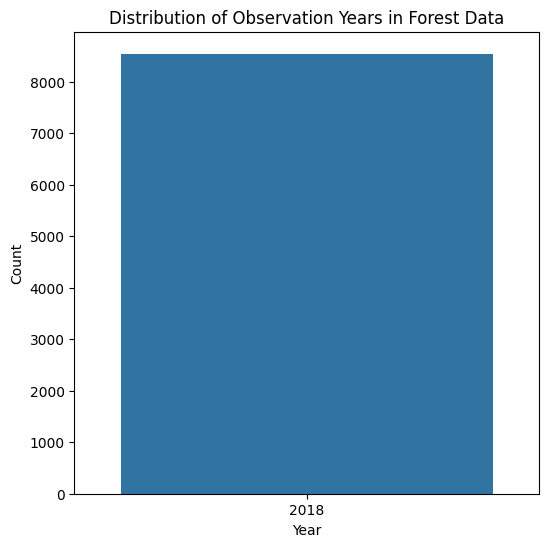

In [ ]:
# Distribution of Year
plt.figure(figsize=(6, 6))
sns.countplot(data=combined_forest_df, x='Year')
plt.title('Distribution of Observation Years in Forest Data')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

There is only one year that is 2018

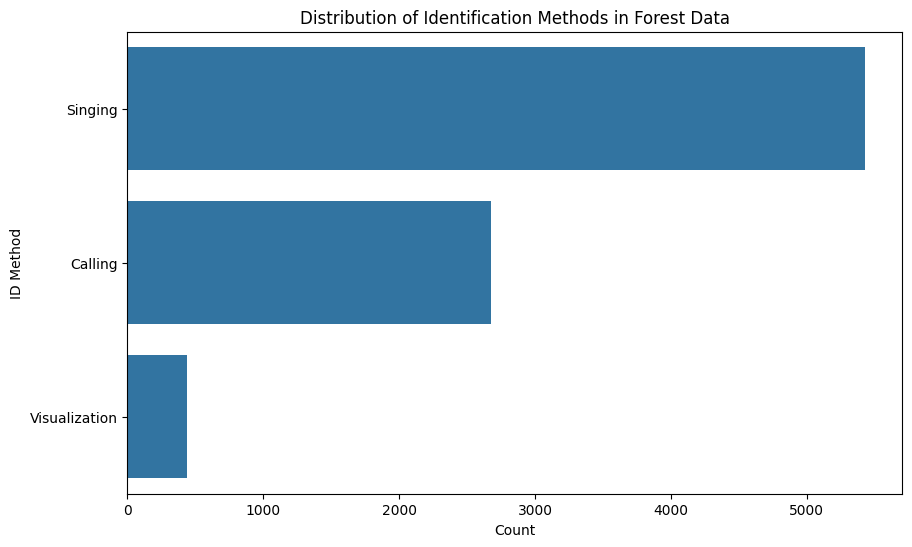

In [ ]:
# Distribution of ID_Method
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_forest_df, y='ID_Method', order=combined_forest_df['ID_Method'].value_counts().index)
plt.title('Distribution of Identification Methods in Forest Data')
plt.xlabel('Count')
plt.ylabel('ID Method')
plt.show()

The most common method for identifying birds was 'Singing', followed by 'Calling' and then 'Visualization'.

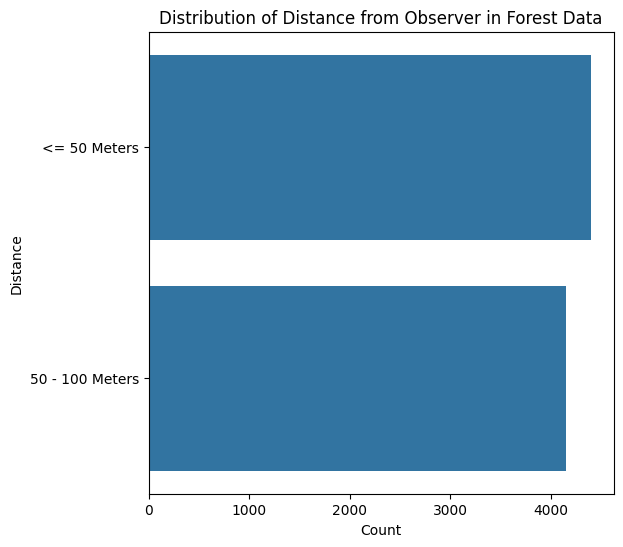

In [ ]:
# Distribution of Distance
plt.figure(figsize=(6, 6))
sns.countplot(data=combined_forest_df, y='Distance', order=combined_forest_df['Distance'].value_counts().index)
plt.title('Distribution of Distance from Observer in Forest Data')
plt.xlabel('Count')
plt.ylabel('Distance')
plt.show()

The majority of observations were made at a distance of '<= 50 Meters'

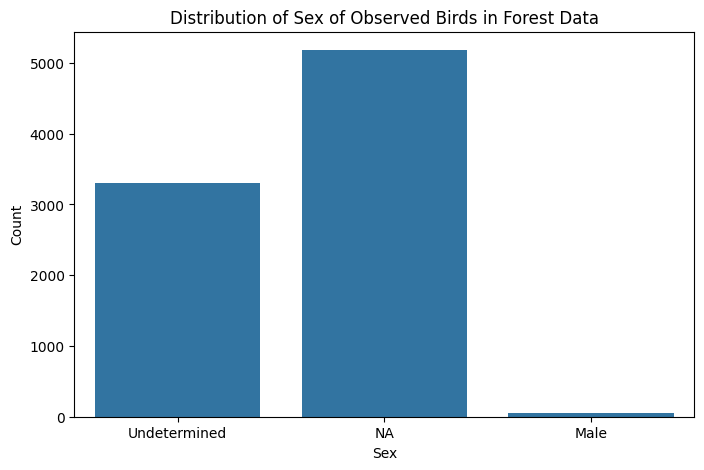

In [ ]:
# Distribution of Sex
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_forest_df, x='Sex')
plt.title('Distribution of Sex of Observed Birds in Forest Data')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

A large portion of the observed birds had an 'NA' sex, indicating that sex was not determined for many observations. Among those with a determined sex, 'Male' observations were more frequent than 'Female'

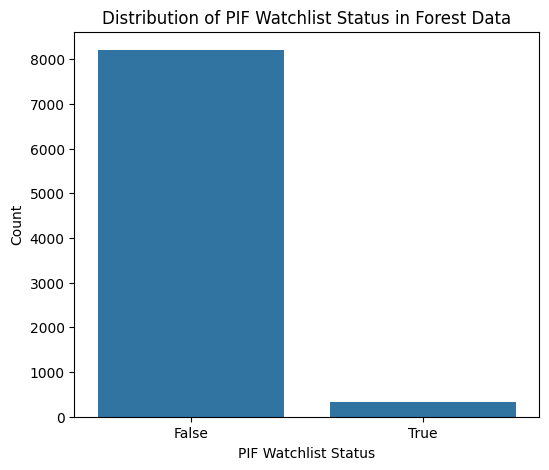

In [ ]:
# Distribution of PIF_Watchlist_Status
plt.figure(figsize=(6, 5))
sns.countplot(data=combined_forest_df, x='PIF_Watchlist_Status')
plt.title('Distribution of PIF Watchlist Status in Forest Data')
plt.xlabel('PIF Watchlist Status')
plt.ylabel('Count')
plt.show()

Most observed species are not on the PIF Watchlist

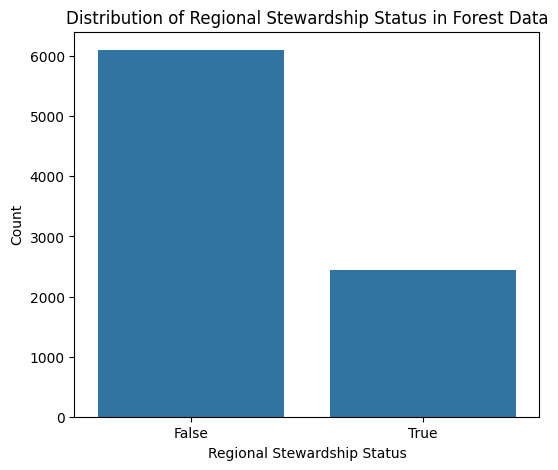

In [ ]:
# Distribution of Regional_Stewardship_Status
plt.figure(figsize=(6, 5))
sns.countplot(data=combined_forest_df, x='Regional_Stewardship_Status')
plt.title('Distribution of Regional Stewardship Status in Forest Data')
plt.xlabel('Regional Stewardship Status')
plt.ylabel('Count')
plt.show()

A significant number of observed species have a 'True' Regional Stewardship Status, suggesting conservation importance in the region

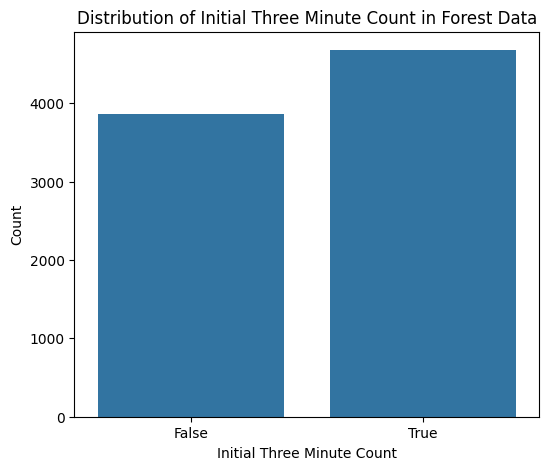

In [ ]:
# Distribution of Initial_Three_Min_Cnt
plt.figure(figsize=(6, 5))
sns.countplot(data=combined_forest_df, x='Initial_Three_Min_Cnt')
plt.title('Distribution of Initial Three Minute Count in Forest Data')
plt.xlabel('Initial Three Minute Count')
plt.ylabel('Count')
plt.show()

There were more instances where a bird was observed within the initial three minutes of the session (True) compared to when it was not (False).

In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
display(combined_forest_df.describe())


Summary Statistics for Numerical Columns:


,Year,NPSTaxonCode,Temperature,Humidity
count,8545.0,8545.000000,8545.000000,8545.000000
mean,2018.0,137093.881919,21.871855,77.757964
std,0.0,154940.628212,3.652583,9.296269
min,2018.0,76625.000000,11.000000,17.500000
25%,2018.0,85846.000000,19.400000,72.500000
50%,2018.0,88350.000000,21.900000,78.800003
75%,2018.0,94215.000000,24.299999,84.300003
max,2018.0,926917.000000,34.400002,97.900002


Bivariate Analysis - Forest Data

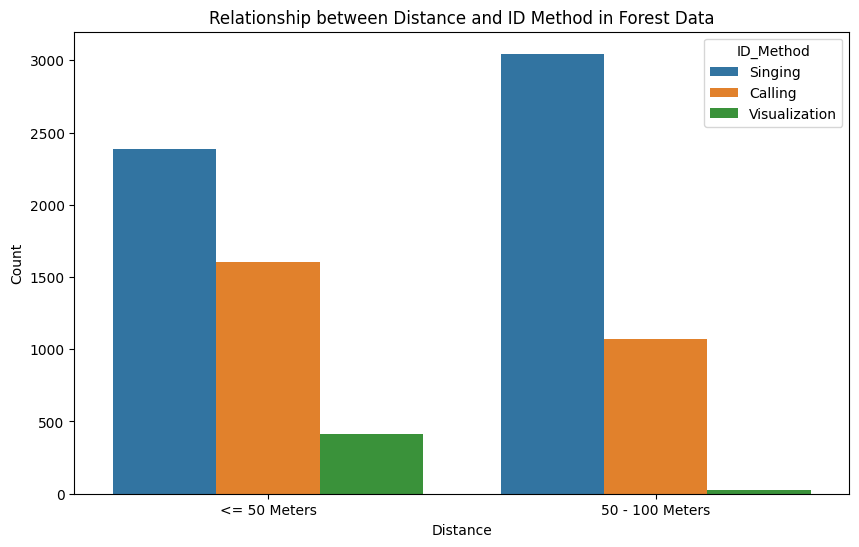

In [ ]:
# Relationship between ID_Method and Distance
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_forest_df, x='Distance', hue='ID_Method')
plt.title('Relationship between Distance and ID Method in Forest Data')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

The plot showing the relationship between 'Distance' and 'ID Method' indicates the following:

For observations made at <= 50 Meters, 'Singing' is the most frequent identification method, followed by 'Calling', and then 'Visualization'

For observations made at 50 - 100 Meters, 'Singing' is also the most frequent identification method, followed by 'Calling'. However, 'Visualization' is used much less frequently at this distance compared to <= 50 meters

This suggests that 'Singing' and 'Calling' are effective identification methods across both distance ranges, while 'Visualization' is predominantly used for birds closer to the observer.

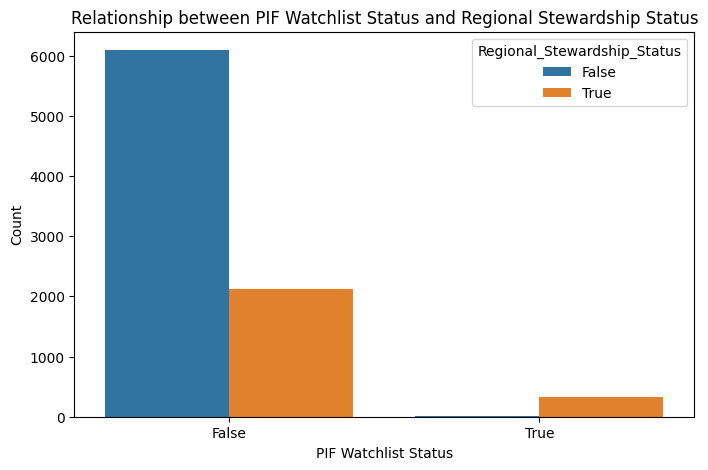

In [ ]:
# Relationship between PIF_Watchlist_Status and Regional_Stewardship_Status
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_forest_df, x='PIF_Watchlist_Status', hue='Regional_Stewardship_Status')
plt.title('Relationship between PIF Watchlist Status and Regional Stewardship Status')
plt.xlabel('PIF Watchlist Status')
plt.ylabel('Count')
plt.show()

This plot shows the relationship between a species being on the PIF Watchlist and having a True Regional Stewardship Status. We can see that:

Among species not on the PIF Watchlist (False), a large number have a False Regional Stewardship Status, but a significant portion still have a True Regional Stewardship Status. This suggests that many species not on the national watchlist are still considered important for regional conservation.

Among species on the PIF Watchlist (True), a smaller number are observed, but a notable proportion of these do have a True Regional Stewardship Status. This is expected, as species on a national watchlist are likely to be considered important regionally as well

This indicates that while the PIF Watchlist is a factor, regional conservation priorities also include species not currently on the national watchlist.

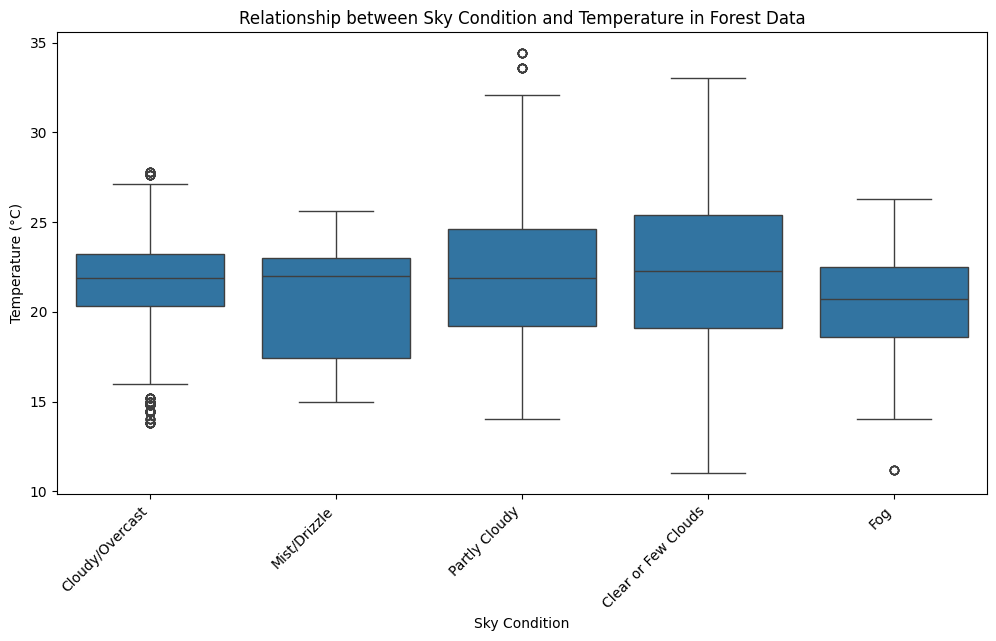

In [ ]:
# Relationship between Sky and Temperature
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_forest_df, x='Sky', y='Temperature')
plt.title('Relationship between Sky Condition and Temperature in Forest Data')
plt.xlabel('Sky Condition')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.show()

This box plot shows the distribution of temperature for different sky conditions. We can observe the following:

Temperatures tend to be slightly higher on average during 'Partly Cloudy' and 'Clear or Few Clouds' conditions compared to 'Cloudy/Overcast', 'Mist/Drizzle', and 'Fog'. There is a wider range of temperatures observed during 'Partly Cloudy' and 'Clear or Few Clouds' days

'Mist/Drizzle' and 'Fog' conditions appear to be associated with cooler and less variable temperatures

There are some outliers, particularly in 'Cloudy/Overcast' and 'Partly Cloudy' conditions, indicating some observations were made at temperatures outside the typical range for those sky types

This suggests that sky conditions can influence the temperature during bird observations, with clearer skies generally associated with higher and more variable temperatures.

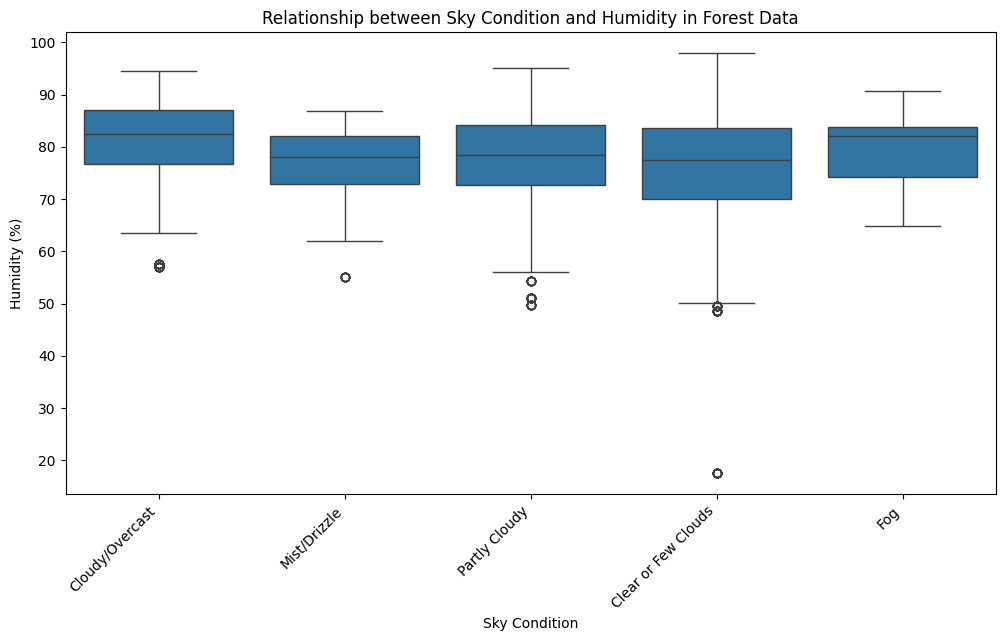

In [ ]:
# Relationship between Sky and Humidity
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_forest_df, x='Sky', y='Humidity')
plt.title('Relationship between Sky Condition and Humidity in Forest Data')
plt.xlabel('Sky Condition')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

This box plot shows the distribution of humidity levels for different sky conditions. We can observe the following:

'Cloudy/Overcast', 'Mist/Drizzle', and 'Fog' conditions are generally associated with higher median humidity levels and narrower interquartile ranges, suggesting consistently high humidity

'Partly Cloudy' and 'Clear or Few Clouds' conditions show slightly lower median humidity levels and wider interquartile ranges, indicating more variability in humidity

There are some outliers with lower humidity in 'Clear or Few Clouds' and 'Partly Cloudy' conditions, which is expected

This suggests that as expected, sky conditions are related to humidity levels, with more clouded or misty conditions corresponding to higher and less variable humidity.

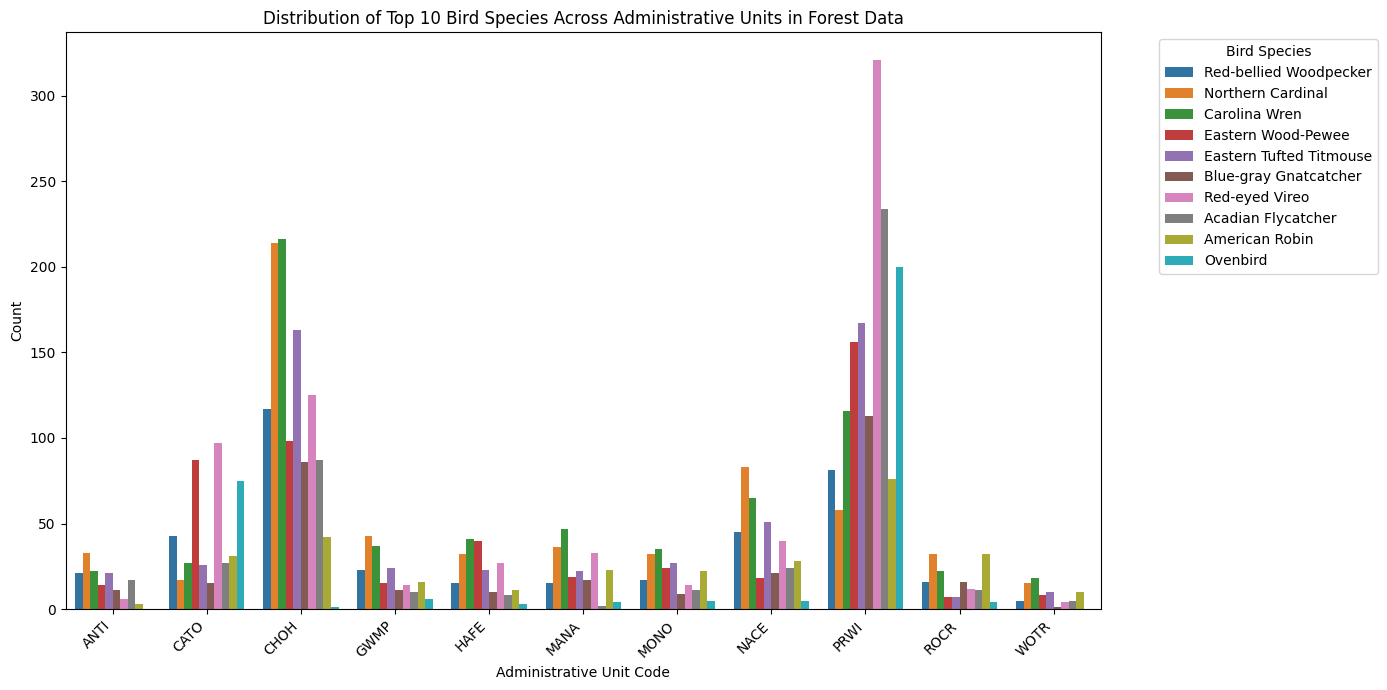

In [ ]:
# Relationship between Admin_Unit_Code and Common_Name (top common names)
top_common_names = combined_forest_df['Common_Name'].value_counts().nlargest(10).index

top_species_df = combined_forest_df[combined_forest_df['Common_Name'].isin(top_common_names)]

plt.figure(figsize=(14, 7))
sns.countplot(data=top_species_df, x='Admin_Unit_Code', hue='Common_Name', palette='tab10')
plt.title('Distribution of Top 10 Bird Species Across Administrative Units in Forest Data')
plt.xlabel('Administrative Unit Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bird Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This chart shows the distribution of the top 10 most frequently observed bird species across the different administrative units in your forest dataset

You can see which administrative units have the highest overall counts of these top species (e.g., PRWI seems to have a high number of observations across several of the top species)

It highlights which species are most common in each administrative unit. For instance, some species might be dominant in one unit but less so in others

The varying heights of the colored bars within each administrative unit show the relative abundance of each of the top 10 species in that unit

This visualization helps to understand the spatial patterns and potential regional variations in the populations of these common bird species within the forest habitat.

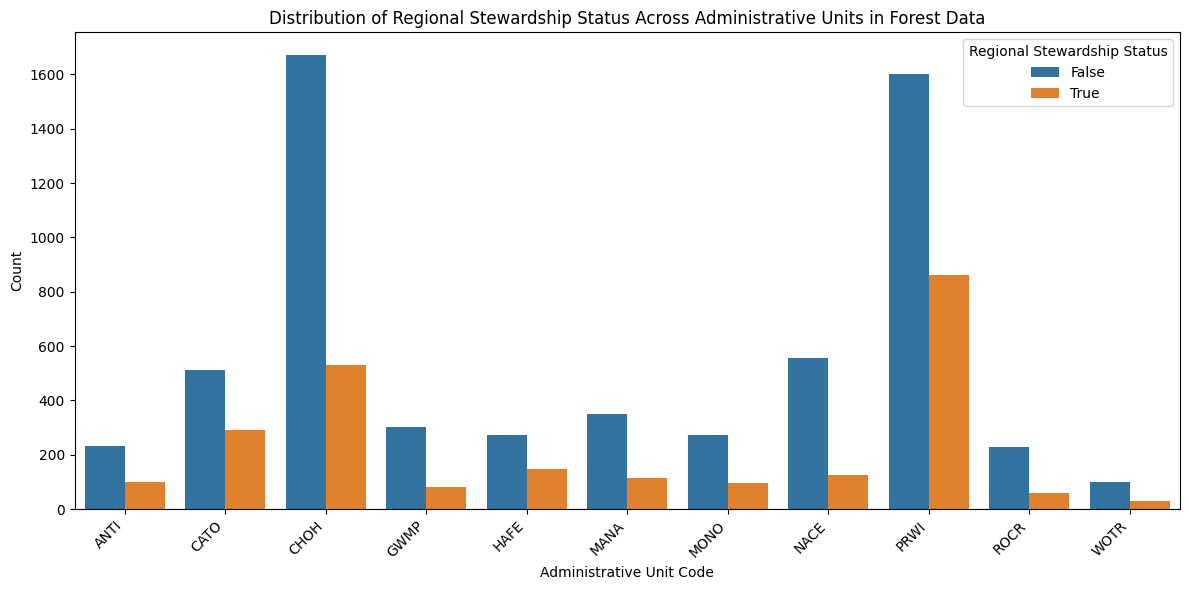

In [ ]:
# Distribution of Regional_Stewardship_Status across Admin_Unit_Code
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_forest_df, x='Admin_Unit_Code', hue='Regional_Stewardship_Status')
plt.title('Distribution of Regional Stewardship Status Across Administrative Units in Forest Data')
plt.xlabel('Administrative Unit Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Regional Stewardship Status')
plt.tight_layout()
plt.show()

This chart shows the distribution of species with 'True' and 'False' Regional Stewardship Status across the different administrative units in the forest data.

Some administrative units, like CHOH and PRWI, have a significantly higher number of observations overall, including both 'True' and 'False' regional stewardship statuses.

Within most administrative units, the number of species with 'False' Regional Stewardship Status is higher than those with 'True'

However, the proportion of species with 'True' Regional Stewardship Status varies across units. Some units might have a higher percentage of regionally important species even if their total observation count is lower. For example, CATO appears to have a relatively higher proportion of 'True' statuses compared to its total count, while units like MANA and MONO have fewer 'True' statuses.

This visualization helps to pinpoint which administrative units are particularly important for regional conservation efforts based on the observed bird species.

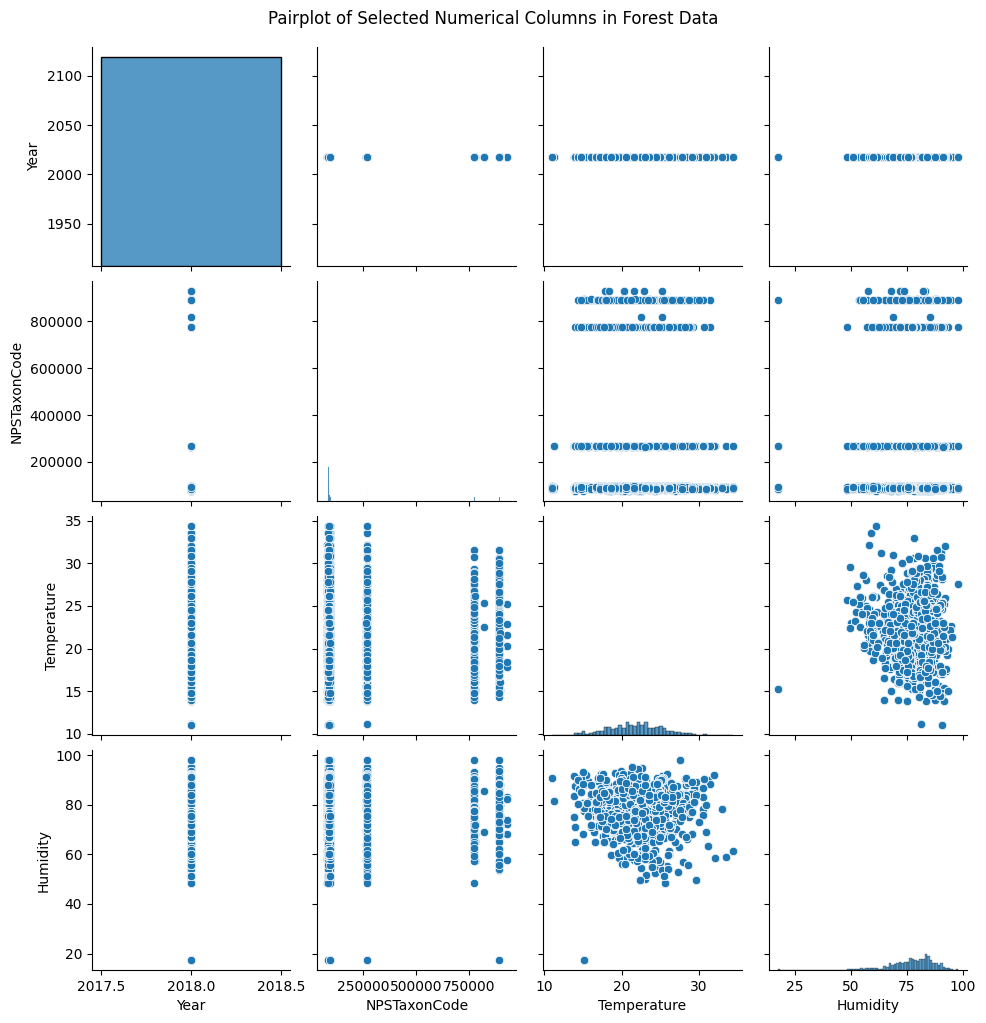

In [ ]:
# Select only numerical columns for the pairplot
numerical_cols = combined_forest_df.select_dtypes(include=np.number).columns
subset_df = combined_forest_df[numerical_cols]

# Generate a pairplot for the subset dataframe
sns.pairplot(subset_df)
plt.suptitle('Pairplot of Selected Numerical Columns in Forest Data', y=1.02)
plt.show()

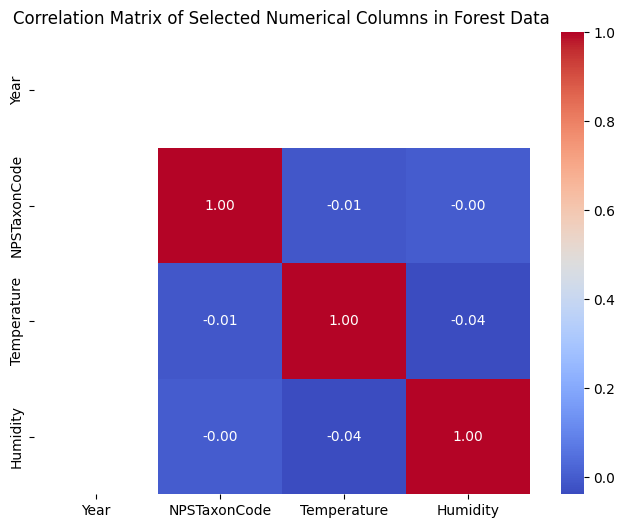

In [ ]:
# Calculate the correlation matrix for the numerical columns
correlation_matrix = subset_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Numerical Columns in Forest Data')
plt.show()

Data Focus: The dataset exclusively contains bird observations from forest locations in the year 2018

Identification Methods: 'Singing' and 'Calling' are the primary methods for identifying birds, particularly at greater distances, while 'Visualization' is more effective for closer observations

Observation Distance: Most bird observations were recorded at a distance of 50 meters or less.

Sex Determination: Sex was not determined for a large number of observed birds. When determined, male birds were observed more frequently.

Conservation Status: While most observed species are not on the national PIF Watchlist, a significant portion are considered important for regional conservation efforts.

Environmental Influence: Sky conditions are related to temperature and humidity, with clearer skies generally being warmer and less humid, and cloudy/misty conditions being cooler and more humid.

Grassland dataset

In [ ]:
Grassland = pd.read_excel('/content/drive/MyDrive/GRASSLAND.XLSX')

Merging All Sheets

In [ ]:
grassland_sheet1_df = pd.read_excel('/content/drive/MyDrive/GRASSLAND.XLSX', sheet_name='ANTI')
grassland_sheet2_df = pd.read_excel('/content/drive/MyDrive/GRASSLAND.XLSX', sheet_name='HAFE')
grassland_sheet3_df = pd.read_excel('/content/drive/MyDrive/GRASSLAND.XLSX', sheet_name='MANA')
grassland_sheet4_df = pd.read_excel('/content/drive/MyDrive/GRASSLAND.XLSX', sheet_name='MONO')

grassland_dataframes = [grassland_sheet1_df, grassland_sheet2_df, grassland_sheet3_df]

combined_grassland_df = pd.concat(grassland_dataframes, ignore_index=True)

print("Combined Grassland Data:")

Combined Grassland Data:


In [ ]:
combined_grassland_df.head(5)

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,00-01-1900 05:35:00,00-01-1900 05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [ ]:
# Save the combined grassland dataframe to a CSV file
combined_grassland_df.to_csv('combined_grassland_data.csv', index=False)

In [ ]:
combined_grassland_df.shape

(5516, 29)

In [ ]:
combined_grassland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516 entries, 0 to 5515
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              5516 non-null   object        
 1   Sub_Unit_Code                0 non-null      float64       
 2   Plot_Name                    5516 non-null   object        
 3   Location_Type                5516 non-null   object        
 4   Year                         5516 non-null   int64         
 5   Date                         5516 non-null   datetime64[ns]
 6   Start_Time                   5516 non-null   object        
 7   End_Time                     5516 non-null   object        
 8   Observer                     5516 non-null   object        
 9   Visit                        5516 non-null   int64         
 10  Interval_Length              5516 non-null   object        
 11  ID_Method                    5515 non-null 

In [ ]:
combined_grassland_df.isnull().sum()

,0
Admin_Unit_Code,0
Sub_Unit_Code,5516
Plot_Name,0
Location_Type,0
Year,0
Date,0
Start_Time,0
End_Time,0
Observer,0
Visit,0


Data cleaning - Grassland Dataset

In [ ]:
# Remove ID_Method row column
combined_grassland_df.dropna(subset=['ID_Method'], inplace=True)

In [ ]:
combined_grassland_df.shape

(5515, 29)

In [ ]:
# Fill 'Distance' column with mode
combined_grassland_df['Distance'].fillna(mode_distance, inplace=True)

In [ ]:
# Fill 'AcceptedTSN' with 'NA'
combined_grassland_df['AcceptedTSN'].fillna('NA', inplace=True)

In [ ]:
# Drop 'TaxonCode' row
combined_grassland_df.dropna(subset=['TaxonCode'], inplace=True)

In [ ]:
combined_grassland_df.shape

(5514, 29)

In [ ]:
combined_grassland_df.head(5)

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,00-01-1900 05:35:00,00-01-1900 05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [ ]:
# Convert the 'Date' column to datetime objects, coercing errors
combined_grassland_df['Date'] = pd.to_datetime(combined_grassland_df['Date'], errors='coerce')

# Format the 'Date' column to display only the date
combined_grassland_df['Date'] = combined_grassland_df['Date'].dt.date

# Display the updated dataframe
display(combined_grassland_df.head())

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,00-01-1900 05:35:00,00-01-1900 05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [ ]:
# Remove '00-01-1900' from the 'Start_Time' column in grassland data
combined_grassland_df['Start_Time'] = combined_grassland_df['Start_Time'].astype(str).str.replace('00-01-1900  ', '', regex=False)

In [ ]:
# Remove '00-01-1900  ' from the 'End_Time' column in grassland data
combined_grassland_df['End_Time'] = combined_grassland_df['End_Time'].astype(str).str.replace('00-01-1900  ', '', regex=False)

In [ ]:
combined_grassland_df.head(5)

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True


In [ ]:
combined_grassland_df.shape

(5514, 29)

Univariate Analysis - Grassland Dataset

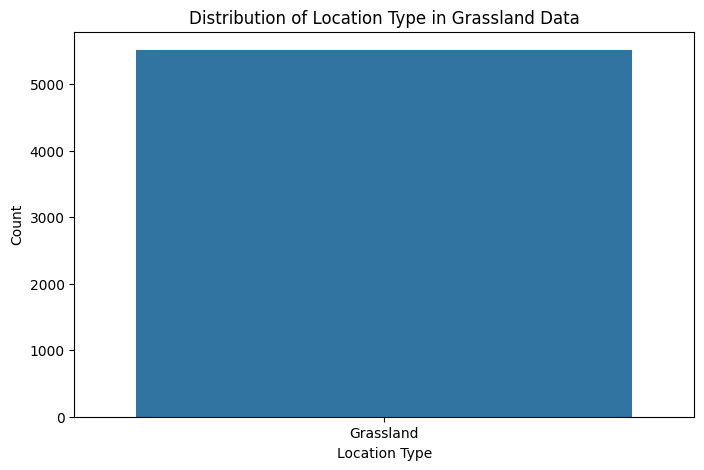

In [ ]:
# Distribution of Location_Type (should be all Grassland)
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_grassland_df, x='Location_Type')
plt.title('Distribution of Location Type in Grassland Data')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

All observations in this dataset are from 'Grassland' locations

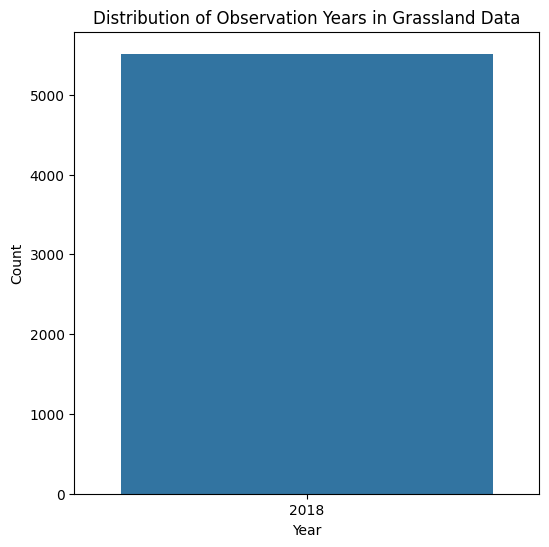

In [ ]:
# Distribution of Year
plt.figure(figsize=(6, 6))
sns.countplot(data=combined_grassland_df, x='Year')
plt.title('Distribution of Observation Years in Grassland Data')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

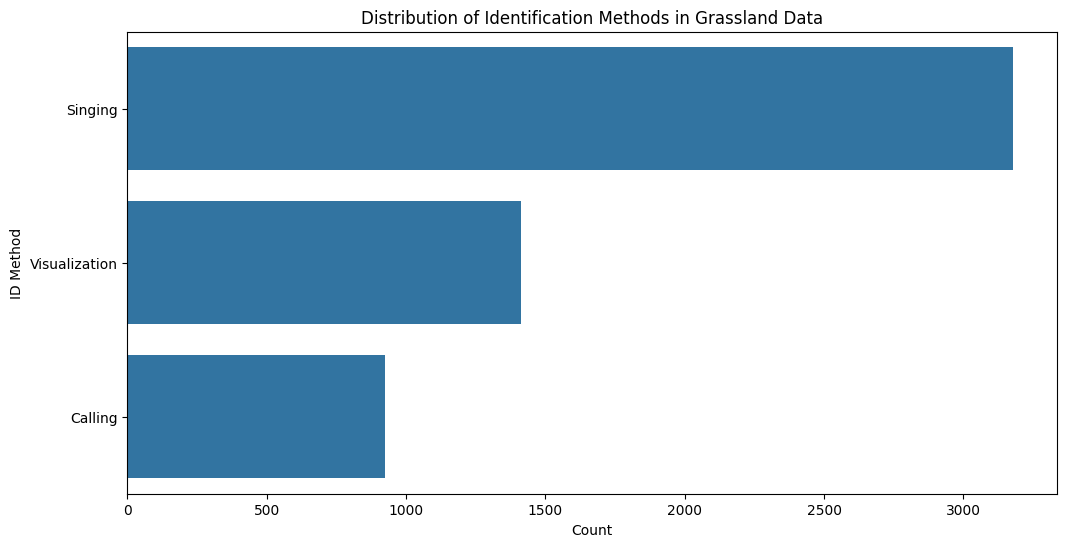

In [ ]:
# Distribution of ID_Method
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_grassland_df, y='ID_Method', order=combined_grassland_df['ID_Method'].value_counts().index)
plt.title('Distribution of Identification Methods in Grassland Data')
plt.xlabel('Count')
plt.ylabel('ID Method')
plt.show()

Similar to the forest data, 'Singing' is the most frequent identification method, followed by 'Calling' and then 'Visualization'. The proportions might differ slightly between habitats

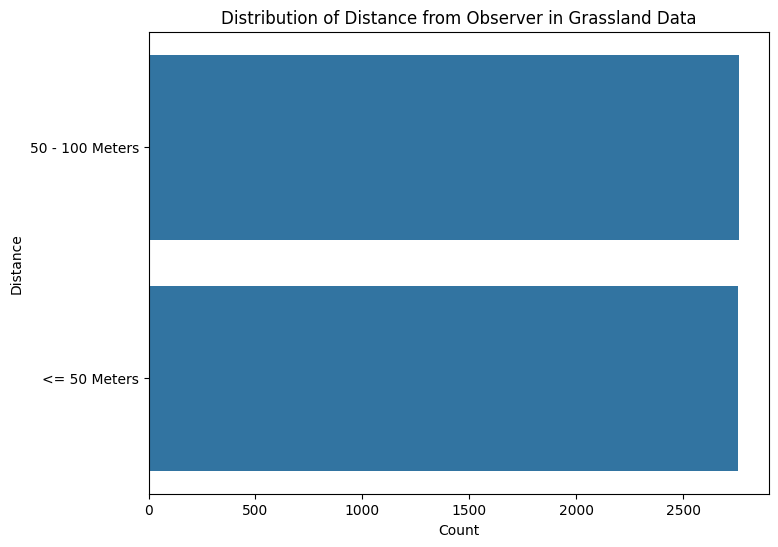

In [ ]:
# Distribution of Distance
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_grassland_df, y='Distance', order=combined_grassland_df['Distance'].value_counts().index)
plt.title('Distribution of Distance from Observer in Grassland Data')
plt.xlabel('Count')
plt.ylabel('Distance')
plt.show()

The distribution of observation distances is similar to the forest data, with a majority of observations at '<= 50 Meters'

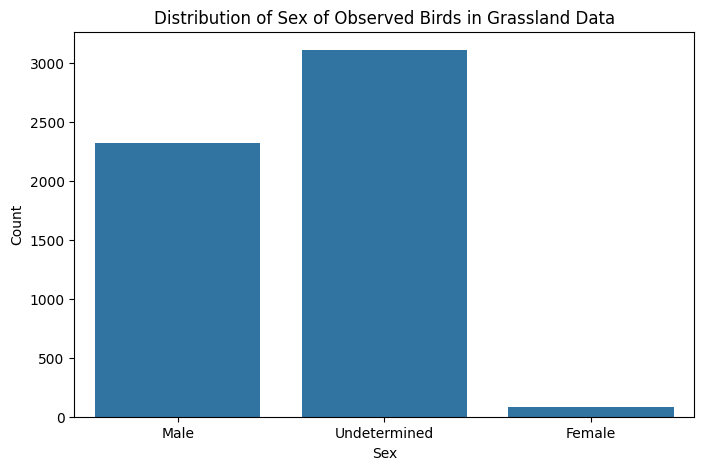

In [ ]:
# Distribution of Sex
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_grassland_df, x='Sex')
plt.title('Distribution of Sex of Observed Birds in Grassland Data')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

The distribution of 'Sex' shows a significant number of 'NA' values, similar to the forest data, indicating sex was not determined for many observations



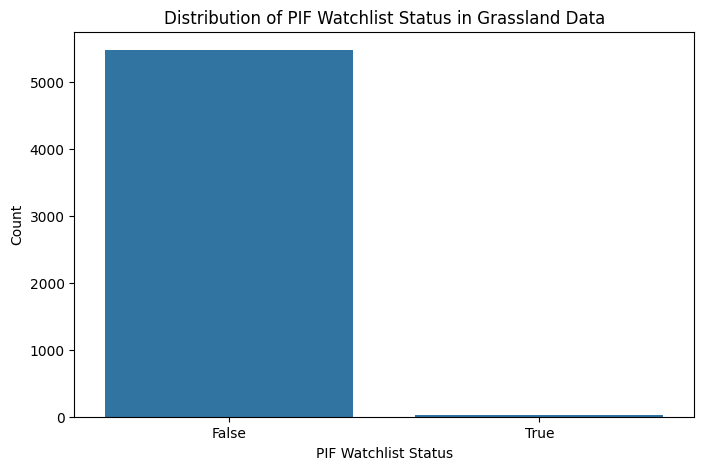

In [ ]:
# Distribution of PIF_Watchlist_Status
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_grassland_df, x='PIF_Watchlist_Status')
plt.title('Distribution of PIF Watchlist Status in Grassland Data')
plt.xlabel('PIF Watchlist Status')
plt.ylabel('Count')
plt.show()

Most observed species in the grassland are also not on the PIF Watchlist

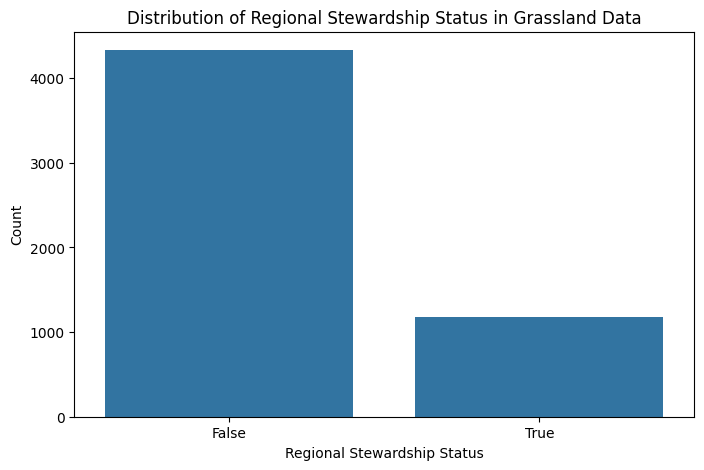

In [ ]:
# Distribution of Regional_Stewardship_Status
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_grassland_df, x='Regional_Stewardship_Status')
plt.title('Distribution of Regional Stewardship Status in Grassland Data')
plt.xlabel('Regional Stewardship Status')
plt.ylabel('Count')
plt.show()

A notable number of observed species in the grassland have a 'True' Regional Stewardship Status, indicating regional conservation importance in this habitat as well

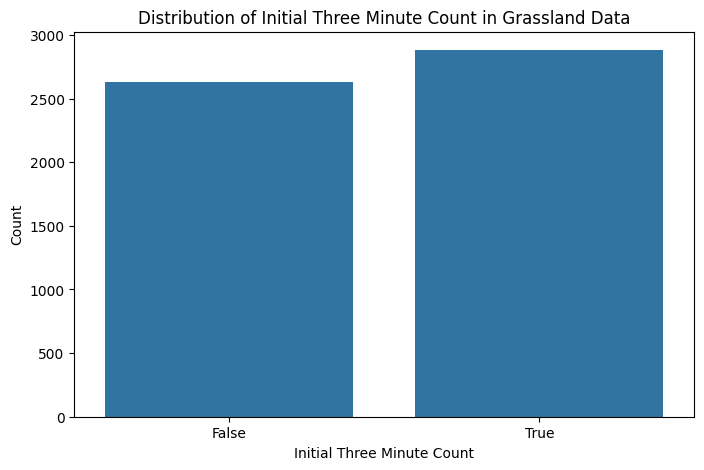

In [ ]:
# Distribution of Initial_Three_Min_Count
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_grassland_df, x='Initial_Three_Min_Cnt')
plt.title('Distribution of Initial Three Minute Count in Grassland Data')
plt.xlabel('Initial Three Minute Count')
plt.ylabel('Count')
plt.show()

There were more instances where a bird was observed within the initial three minutes of the session (True) compared to when it was not (False), similar to the forest data.

In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
display(combined_grassland_df.describe())


Summary Statistics for Numerical Columns:


,Sub_Unit_Code,Year,Visit,TaxonCode,Temperature,Humidity
count,0.0,5514.0,5514.000000,5514.000000,5514.000000,5514.000000
mean,NaN,2018.0,1.916757,103735.339318,24.071092,71.116558
std,NaN,0.0,0.820868,87162.610958,4.583418,13.087909
min,NaN,2018.0,1.000000,76625.000000,12.900000,32.900002
25%,NaN,2018.0,1.000000,84790.000000,21.200001,63.900002
50%,NaN,2018.0,2.000000,88296.000000,23.600000,72.300003
75%,NaN,2018.0,3.000000,94206.000000,27.000000,81.599998
max,NaN,2018.0,3.000000,926917.000000,37.299999,93.300003


Bivariate Analysis - Grassland Dataset

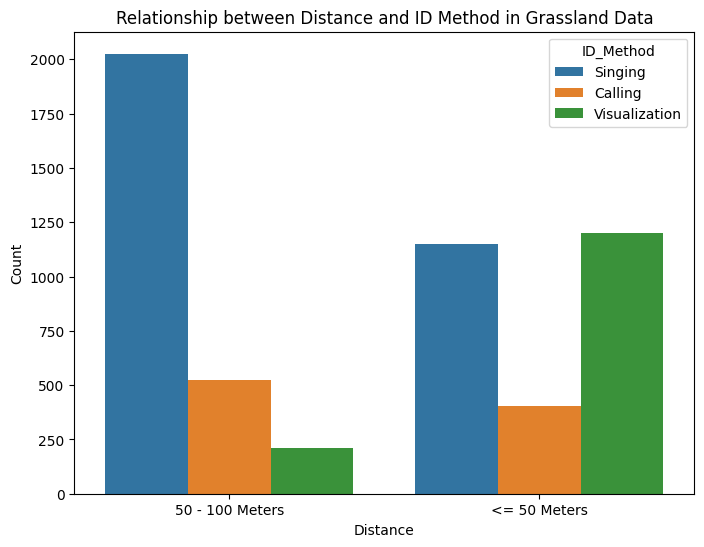

In [ ]:
# Relationship between ID_Method and Distance
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_grassland_df, x='Distance', hue='ID_Method')
plt.title('Relationship between Distance and ID Method in Grassland Data')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

This plot shows the relationship between 'Distance' and 'ID Method' in the grassland data. Here are the key observations:

For observations made at <= 50 Meters, 'Visualization' is the most frequent identification method, followed by 'Singing' and then 'Calling'.

For observations made at 50 - 100 Meters, 'Singing' is the most frequent identification method, followed by 'Calling', and then 'Visualization'.

Comparing this to the forest data, there's a notable difference: 'Visualization' is the most common method at closer distances in grasslands, while 'Singing' was dominant at both distances in forests. This could be due to the more open nature of grasslands allowing for easier visual identification at closer ranges.

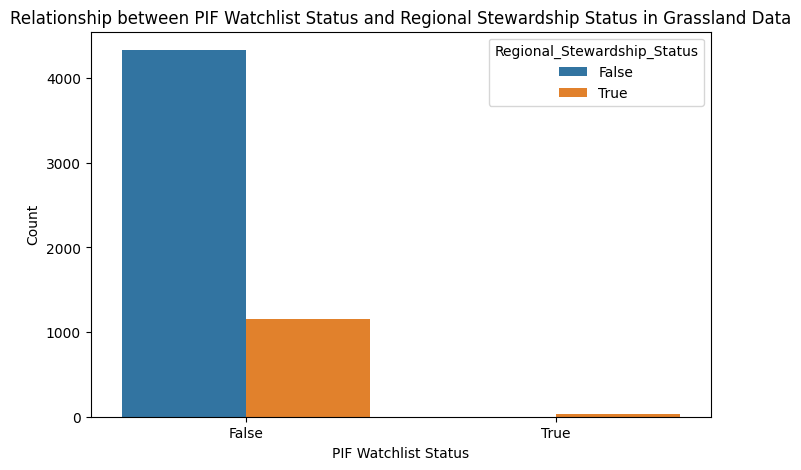

In [ ]:
# Relationship between PIF_Watchlist_Status and Regional_Stewardship_Status in Grassland Data
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_grassland_df, x='PIF_Watchlist_Status', hue='Regional_Stewardship_Status')
plt.title('Relationship between PIF Watchlist Status and Regional Stewardship Status in Grassland Data')
plt.xlabel('PIF Watchlist Status')
plt.ylabel('Count')
plt.show()

This plot shows the relationship between a species being on the PIF Watchlist and having a True Regional Stewardship Status in the grassland data

Similar to the forest data, among species not on the PIF Watchlist (False), a large number have a False Regional Stewardship Status, but a significant portion still have a True Regional Stewardship Status

Among species on the PIF Watchlist (True), the number of observations is very small, but there are some instances of these species having a True Regional Stewardship Status

This indicates that in grasslands as well, regional conservation priorities include species not exclusively on the national PIF Watchlist.

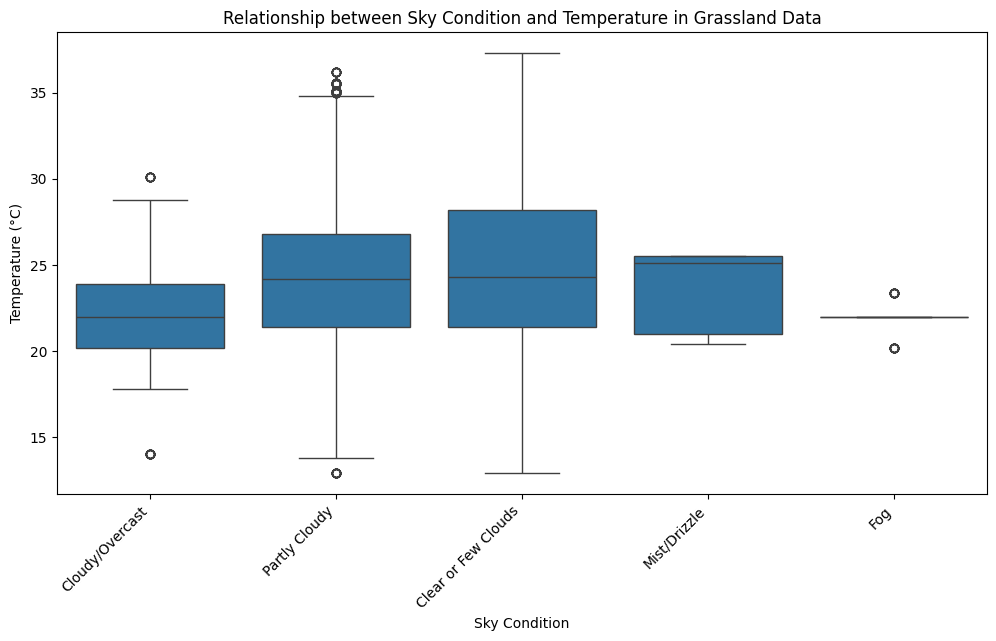

In [ ]:
# Relationship between Sky and Temperature in Grassland Data
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_grassland_df, x='Sky', y='Temperature')
plt.title('Relationship between Sky Condition and Temperature in Grassland Data')
plt.xlabel('Sky Condition')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.show()

This box plot shows the distribution of temperature for different sky conditions in the grassland data. We can observe some similar patterns to the forest data

Temperatures appear to be generally higher in grasslands compared to forests, especially during 'Partly Cloudy' and 'Clear or Few Clouds' conditions, which show a wider temperature range and higher median temperatures.

'Cloudy/Overcast' and 'Mist/Drizzle' conditions are associated with slightly lower temperatures and less variability

There are fewer observations for 'Fog' in the grassland data, but the temperatures appear to be in a similar range to 'Cloudy/Overcast' and 'Mist/Drizzle'

Outliers are present, indicating some temperature observations fall outside the typical range for certain sky conditions

This suggests that sky conditions influence temperature in grasslands, with clearer conditions generally being warmer, and that overall temperatures might be higher in grasslands compared to forests during the observation period.

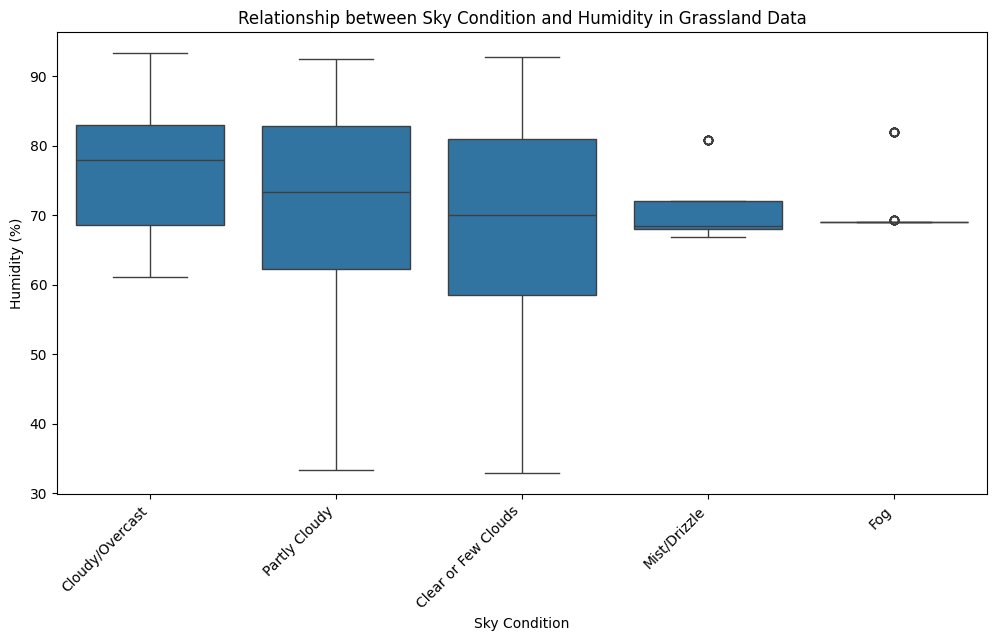

In [ ]:
# Relationship between Sky and Humidity in Grassland Data
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_grassland_df, x='Sky', y='Humidity')
plt.title('Relationship between Sky Condition and Humidity in Grassland Data')
plt.xlabel('Sky Condition')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

This box plot shows the distribution of humidity levels for different sky conditions in the grassland data

'Cloudy/Overcast', 'Mist/Drizzle', and 'Fog' conditions are generally associated with higher median humidity levels, similar to the forest data

'Partly Cloudy' and 'Clear or Few Clouds' conditions tend to have slightly lower median humidity and more variability

Outliers with lower humidity are present, particularly in 'Clear or Few Clouds' conditions.

This suggests that sky conditions are related to humidity levels in grasslands, much like in forests, but the overall humidity might be lower in grasslands during the observation period.

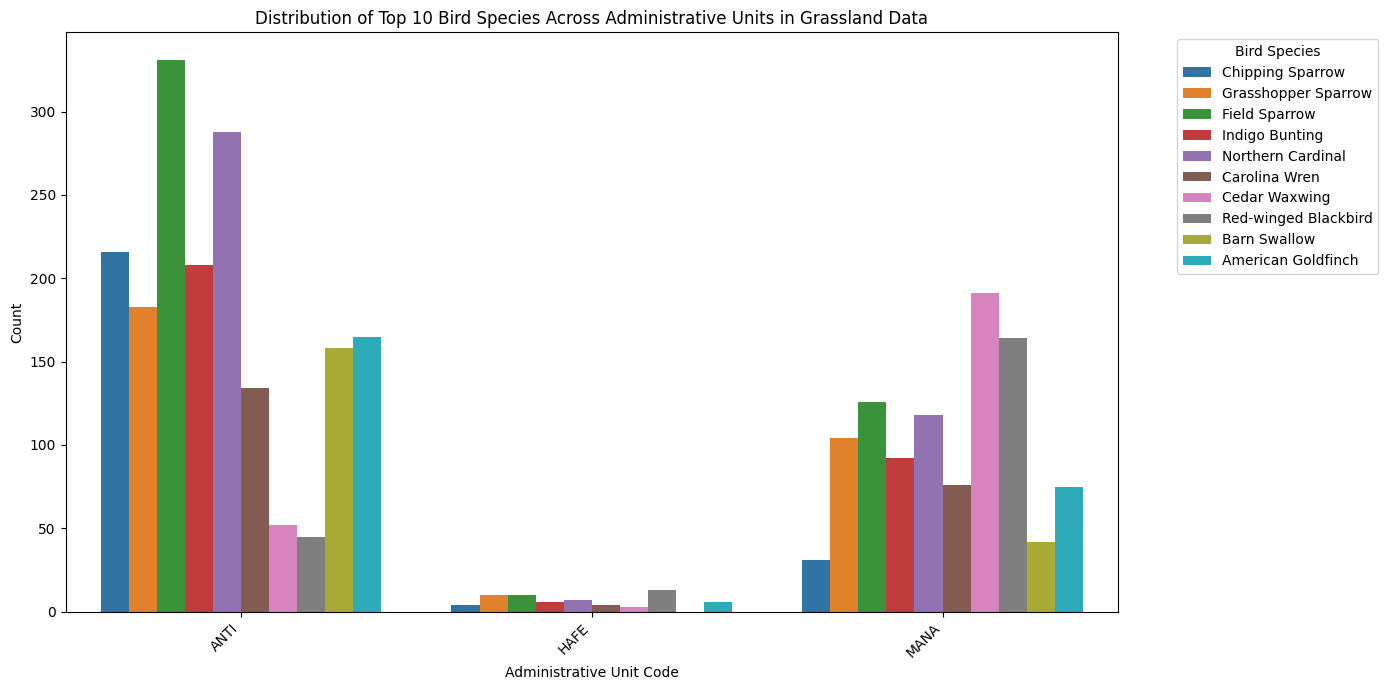

In [ ]:
# Relationship between Admin_Unit_Code and Common_Name (top common names) in Grassland Data
top_common_names_grassland = combined_grassland_df['Common_Name'].value_counts().nlargest(10).index
top_species_grassland_df = combined_grassland_df[combined_grassland_df['Common_Name'].isin(top_common_names_grassland)]

plt.figure(figsize=(14, 7))
sns.countplot(data=top_species_grassland_df, x='Admin_Unit_Code', hue='Common_Name', palette='tab10')
plt.title('Distribution of Top 10 Bird Species Across Administrative Units in Grassland Data')
plt.xlabel('Administrative Unit Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bird Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This chart shows the distribution of the top 10 most frequently observed bird species across the different administrative units in your grassland dataset.

You can identify which administrative units in the grassland habitat have the highest overall counts of these top 10 species (e.g., ANTI and MANA appear to have high numbers of observations for several of these species).

It highlights which of these top species are most common within each administrative unit in the grasslands. For instance, some species might be very abundant in one grassland unit but less so in others

The varying heights of the colored bars within each administrative unit illustrate the relative abundance of each of the top 10 grassland species in that specific unit

This visualization helps in understanding the spatial distribution and potential regional differences in the populations of these common bird species within the grassland habitat.

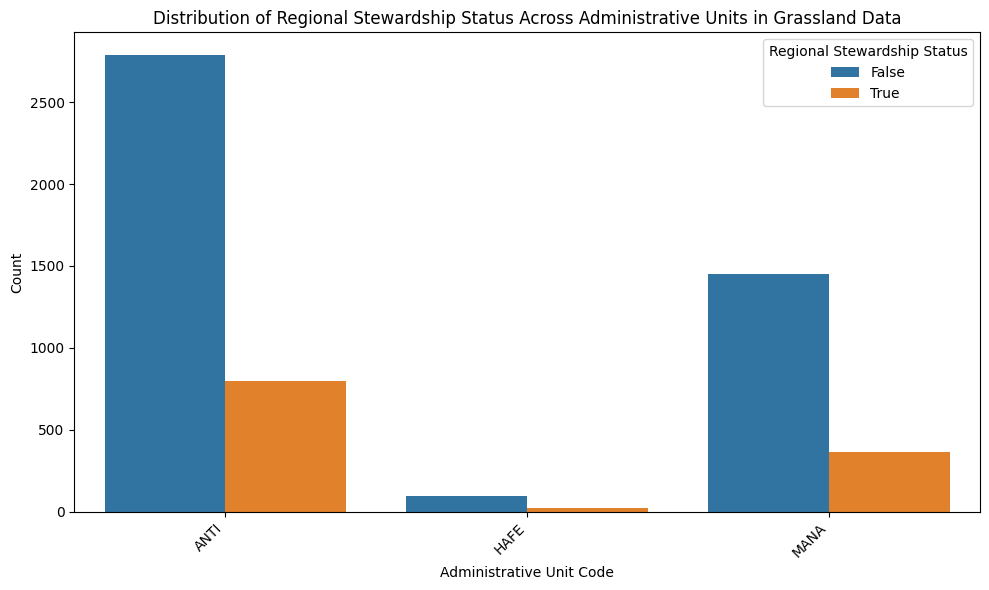

In [ ]:
# Distribution of Regional_Stewardship_Status across Admin_Unit_Code in Grassland Data
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_grassland_df, x='Admin_Unit_Code', hue='Regional_Stewardship_Status')
plt.title('Distribution of Regional Stewardship Status Across Administrative Units in Grassland Data')
plt.xlabel('Administrative Unit Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Regional Stewardship Status')
plt.tight_layout()
plt.show()

This chart shows the distribution of species with 'True' and 'False' Regional Stewardship Status across the different administrative units in the grassland data

Some administrative units, like ANTI and MANA, have a significantly higher number of observations overall in the grassland habitat, including both 'True' and 'False' regional stewardship statuses

Within these administrative units, the number of species with 'False' Regional Stewardship Status is higher than those with 'True'

The administrative unit HAFE has a much lower number of observations compared to ANTI and MANA, but it still shows a presence of species with both 'True' and 'False' Regional Stewardship Status

This visualization helps to understand the distribution of regionally important species within the different administrative units of the grassland habitat.

In [ ]:
numerical_cols_grassland = ['Year', 'Visit', 'Temperature', 'Humidity']
subset_grassland_df = combined_grassland_df[numerical_cols_grassland]

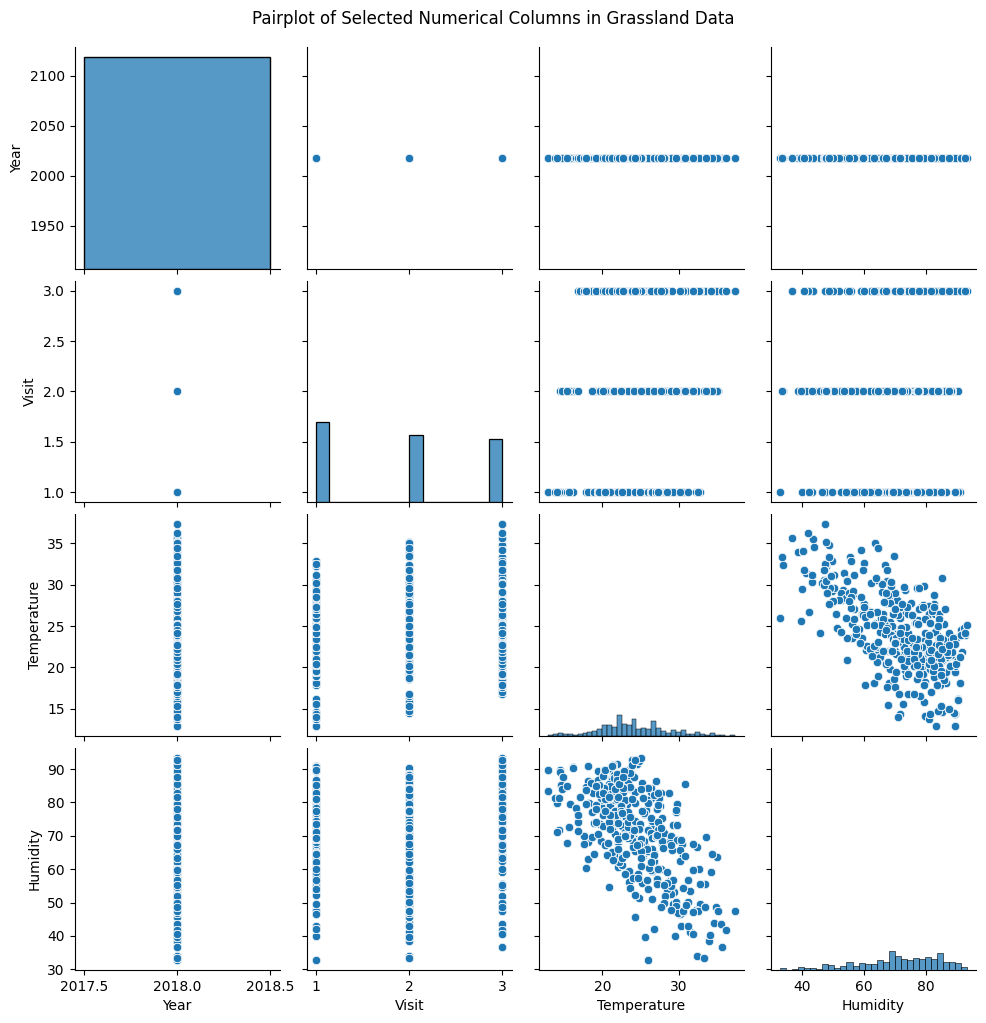

In [ ]:
# Generate a pairplot for the grassland subset dataframe
sns.pairplot(subset_grassland_df)
plt.suptitle('Pairplot of Selected Numerical Columns in Grassland Data', y=1.02)
plt.show()

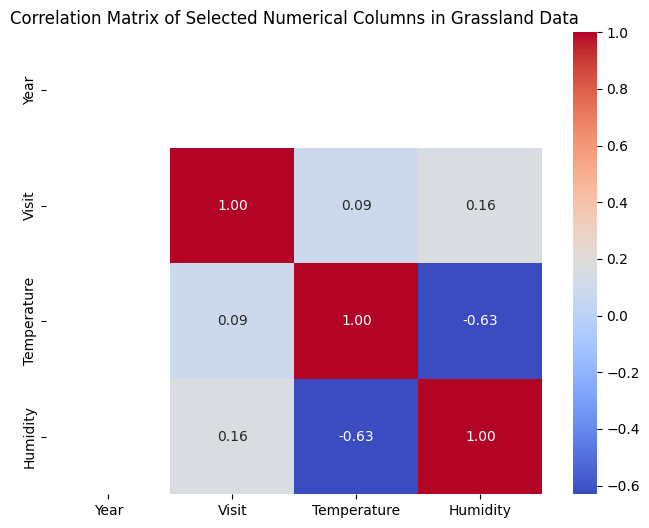

In [ ]:
# Calculate the correlation matrix for the numerical columns in grassland data
correlation_matrix_grassland = subset_grassland_df.corr()

# Generate a heatmap of the correlation matrix for grassland data
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_grassland, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Numerical Columns in Grassland Data')
plt.show()

Habitat and Year: The dataset exclusively contains bird observations from grassland locations in the year 2018.

Identification Methods: 'Singing' is the most frequent identification method overall in grasslands, but 'Visualization' is the most common method at closer distances (<= 50 Meters), unlike in forests where 'Singing' was dominant at both distances. 'Calling' is used less frequently than singing and visualization.

Observation Distance: Similar to the forest data, a significant portion of observations were made at a distance of '<= 50 Meters'.

Sex Determination: A large number of observations have 'NA' for the Sex of the bird, indicating sex was often not determined.

Conservation Status: While most observed species are not on the national PIF Watchlist, a notable number have a 'True' Regional_Stewardship_Status, highlighting their importance for regional conservation in grassland habitats.

Environmental Influence: Sky conditions are related to temperature and humidity in grasslands. Clearer conditions are generally warmer, while cloudy/misty conditions are associated with higher humidity. Overall temperatures might be higher in grasslands compared to forests during the observation period, and humidity might be lower.

Administrative Unit Distribution: The distribution of top bird species and species with 'True' Regional Stewardship Status varies across the administrative units in the grassland dataset, indicating regional differences in species composition and conservation priorities.

Numerical Relationships: There is a moderate negative correlation between Temperature and Humidity in the grassland dataset.

Combinding both datasets - Forest and Grassland Datasets

In [ ]:
combined_habitat_df = pd.concat([combined_forest_df, combined_grassland_df], ignore_index=True)

In [ ]:
combined_habitat_df.head(5)

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,TaxonCode,Previously_Obs
0,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN
1,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN
2,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN
3,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN
4,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN


In [ ]:
combined_habitat_df.shape

(14059, 31)

In [ ]:
combined_habitat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Admin_Unit_Code              14059 non-null  object 
 1   Sub_Unit_Code                8545 non-null   object 
 2   Site_Name                    8545 non-null   object 
 3   Plot_Name                    14059 non-null  object 
 4   Location_Type                14059 non-null  object 
 5   Year                         14059 non-null  int64  
 6   Date                         14058 non-null  object 
 7   Start_Time                   14059 non-null  object 
 8   End_Time                     14059 non-null  object 
 9   Observer                     14059 non-null  object 
 10  Visit                        14059 non-null  object 
 11  Interval_Length              14059 non-null  object 
 12  ID_Method                    14059 non-null  object 
 13  Distance        

In [ ]:
combined_habitat_df.isnull().sum()

,0
Admin_Unit_Code,0
Sub_Unit_Code,5514
Site_Name,5514
Plot_Name,0
Location_Type,0
Year,0
Date,1
Start_Time,0
End_Time,0
Observer,0


Data cleaning - Combined dataset

In [ ]:
# Sub unit code fill with 'NA'
combined_habitat_df['Sub_Unit_Code'].fillna('NA', inplace=True)

In [ ]:
# Fill Site_Name fill with 'NA'
combined_habitat_df['Site_Name'].fillna('NA', inplace=True)

In [ ]:
# Fill ID_Method with mode
mode_id_method = combined_habitat_df['ID_Method'].mode()[0]
combined_habitat_df['ID_Method'].fillna(mode_id_method, inplace=True)

In [ ]:
# Fill distance column with mode
mode_distance = combined_habitat_df['Distance'].mode()[0]
combined_habitat_df['Distance'].fillna(mode_distance, inplace=True)

In [ ]:
# Fill 'Sex' column filled with 'NA'
combined_habitat_df['Sex'].fillna('NA', inplace=True)

In [ ]:
# Fill 'AcceptedTSN' fill with 'NA'
combined_habitat_df['AcceptedTSN'].fillna('NA', inplace=True)

In [ ]:
# Fill 'NPSTaxonCode' fill with 'NA'
combined_habitat_df['NPSTaxonCode'].fillna('NA', inplace=True)

In [ ]:
# Fill 'Previously_Obs' with 'NA'
combined_habitat_df.fillna('NA', inplace=True)

In [ ]:
combined_habitat_df.head(5)

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,TaxonCode,Previously_Obs
0,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NA,NA
1,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NA,NA
2,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NA,NA
3,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NA,NA
4,ANTI,NA,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NA,NA


In [ ]:
combined_habitat_df.shape

(14059, 31)

Univariate Analysis - Combinded Dataset (Forest and Grassland

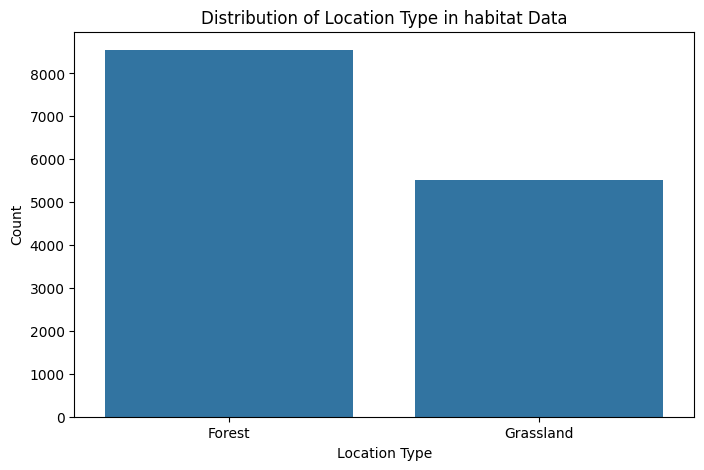

In [ ]:
# Distribution of Location_Type (should be combined dataset)
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_habitat_df, x='Location_Type')
plt.title('Distribution of Location Type in habitat Data')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

There are two types in dataset "Forest' and 'Grassland'

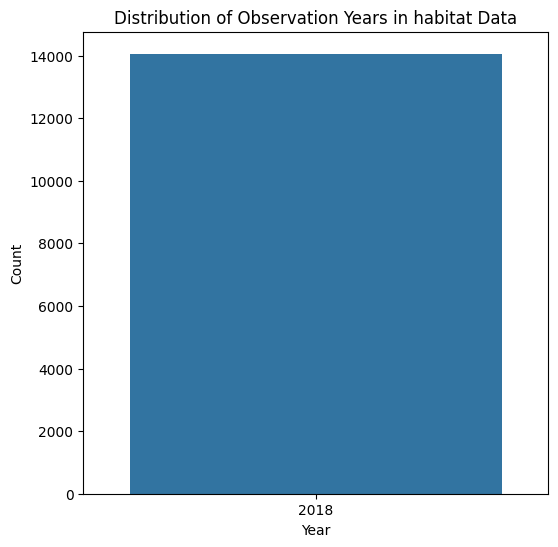

In [ ]:
# Distribution of Year
plt.figure(figsize=(6, 6))
sns.countplot(data=combined_habitat_df, x='Year')
plt.title('Distribution of Observation Years in habitat Data')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

There is only one year i.e 2018

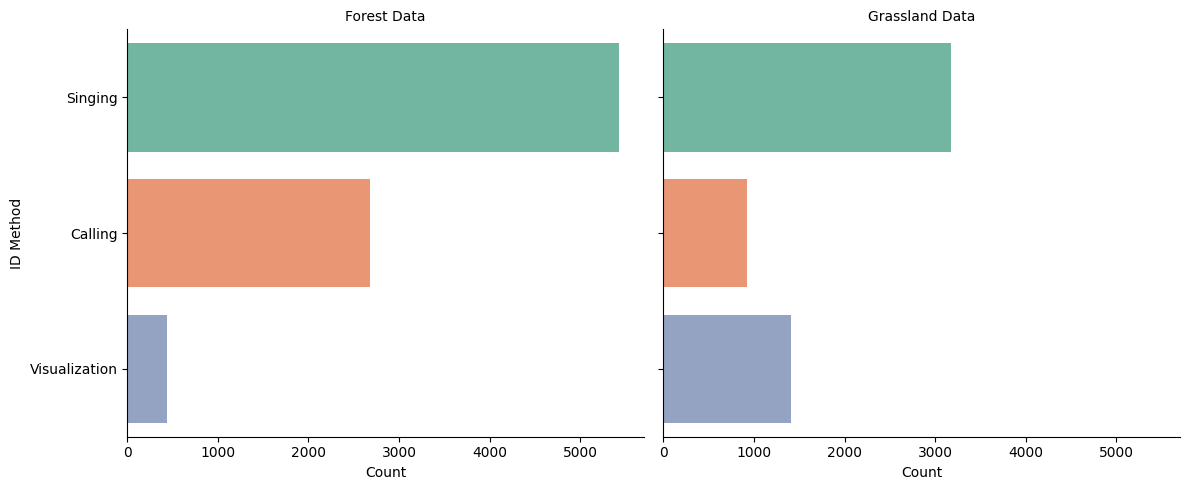

In [ ]:
# Distribution of ID_Method
g = sns.catplot(
data=combined_habitat_df, y='ID_Method', order=combined_habitat_df['ID_Method'].value_counts().index, col='Location_Type',
kind='count', height=5, aspect=1.2, palette='Set2')

g.set_axis_labels("Count", "ID Method")
g.set_titles("{col_name} Data")
plt.show()

This chart shows the distribution of identification methods ('Singing', 'Calling', and 'Visualization') separately for Forest and Grassland habitats. It highlights the following:

Forest Data: 'Singing' is the most frequent identification method, followed by 'Calling', and then 'Visualization'

Grassland Data: 'Singing' is also the most frequent identification method overall, but 'Visualization' is more common than 'Calling'.

This indicates that while singing is a primary method in both habitats, the relative importance of calling versus visualization differs between forests and grasslands.



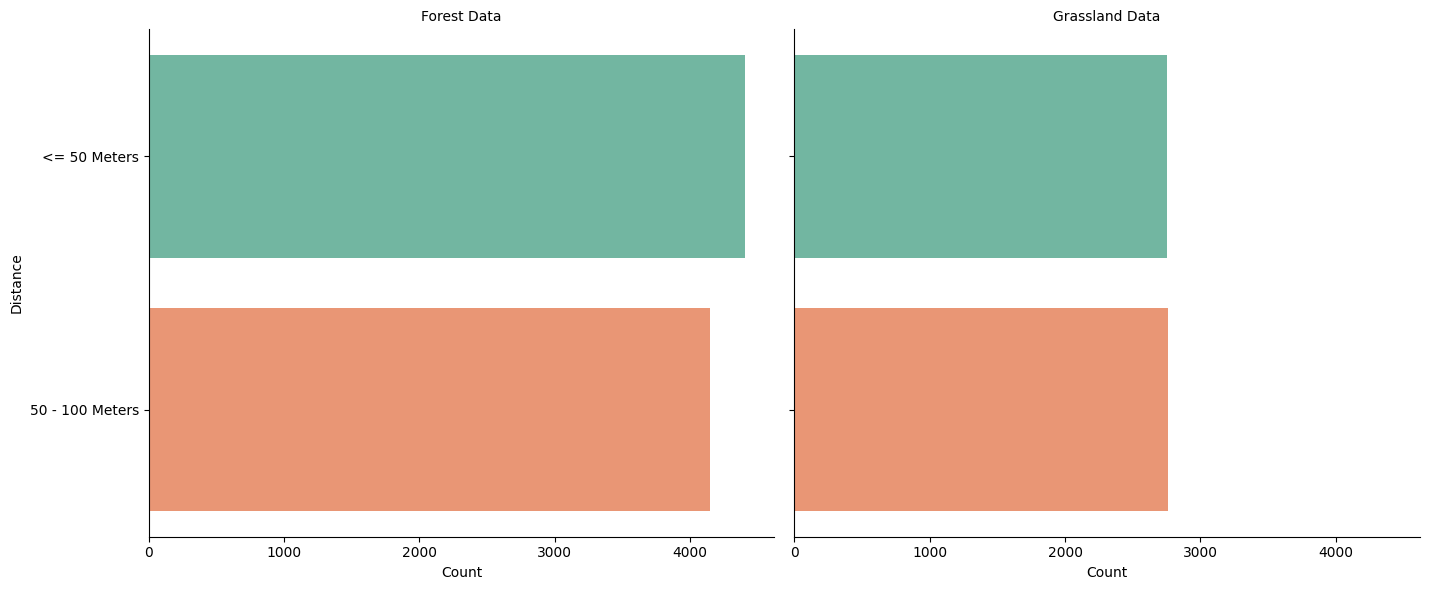

In [ ]:
# Catplot for distibution of distance
g = sns.catplot(
data=combined_habitat_df, y='Distance', order=combined_habitat_df['Distance'].value_counts().index, col='Location_Type',
kind='count', height=6, aspect=1.2, palette='Set2')
g.set_axis_labels("Count", "Distance")
g.set_titles("{col_name} Data")
plt.show()

This chart shows the distribution of observation distances ('<= 50 Meters' and '50 - 100 Meters') separately for Forest and Grassland habitats.

In both Forest and Grassland data, the majority of observations were recorded at a distance of '<= 50 Meters'. The counts are similar for both habitats at this distance.

For observations made at '50 - 100 Meters', the counts are also comparable between Forest and Grassland habitats.

This indicates that the distribution of observation distances is relatively consistent across both habitat types, with a strong emphasis on observations made closer to the observer

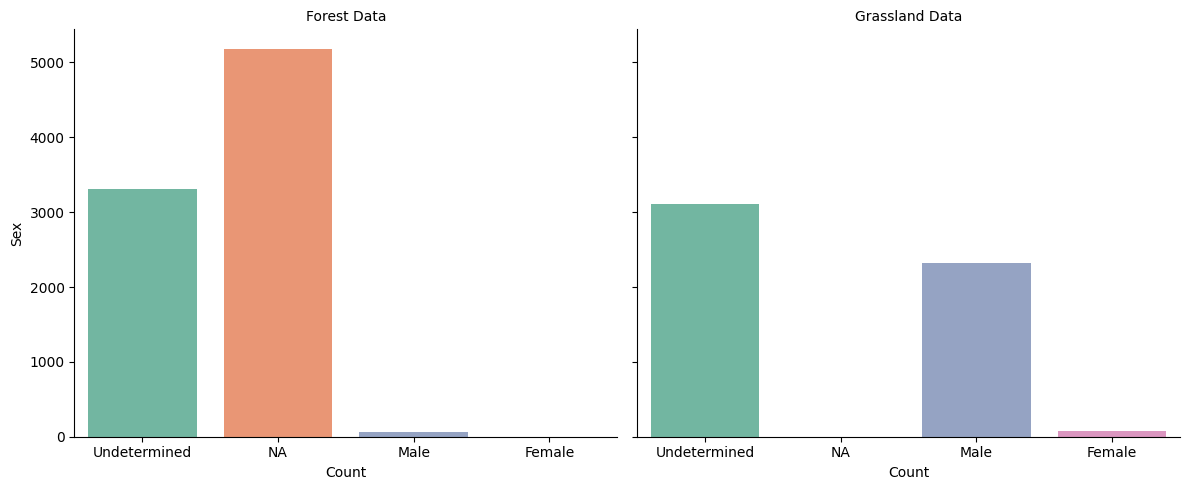

In [ ]:
# Catplot for Sex distribution split by Location_Type
g = sns.catplot(
data=combined_habitat_df, x='Sex', col='Location_Type', kind='count', height=5, aspect=1.2, palette='Set2')
g.set_axis_labels("Count", "Sex")
g.set_titles("{col_name} Data")
plt.show()

This chart shows the distribution of observed bird sex ('Undetermined', 'NA', and 'Male') separately for Forest and Grassland habitats.

In both Forest and Grassland data, there is a significant number of observations where the sex of the bird was not determined ('Undetermined' or 'NA')

Among the observations where sex was determined, 'Male' birds were observed more frequently than 'Female' birds in both habitats.

The proportion of 'Undetermined' and 'NA' values appears to be higher in the Forest data compared to the Grassland data



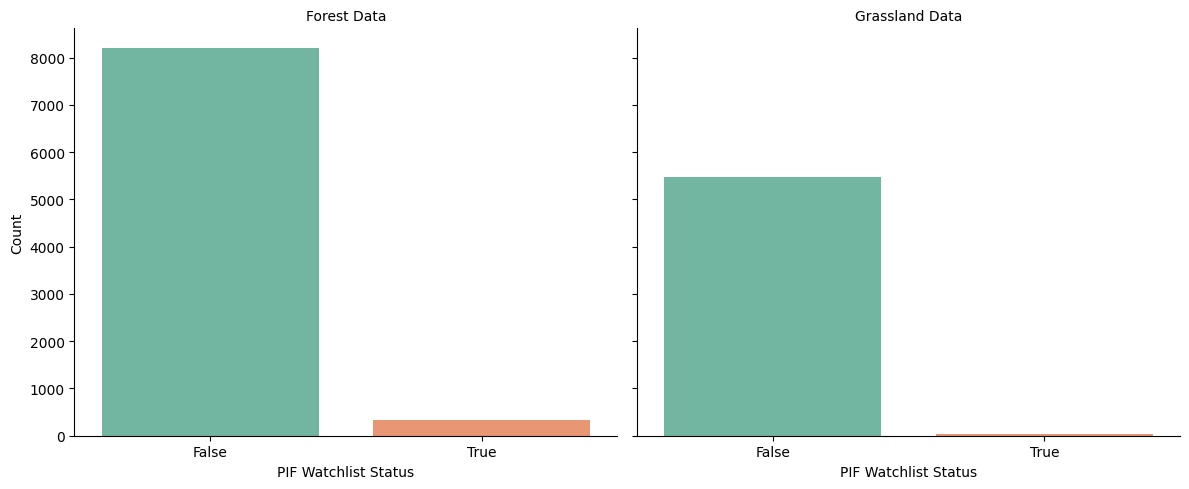

In [ ]:
# Catplot for PIF Watchlist Status split by Location_Type
g = sns.catplot(data=combined_habitat_df, x='PIF_Watchlist_Status', col='Location_Type', kind='count', height=5, aspect=1.2, palette='Set2')
g.set_axis_labels("PIF Watchlist Status", "Count")
g.set_titles("{col_name} Data")
plt.show()

This chart shows the distribution of species on the PIF Watchlist ('True' or 'False') separately for Forest and Grassland habitats.

In both Forest and Grassland data, the vast majority of observed species are not on the PIF Watchlist ('False').

There is a small number of observed species that are on the PIF Watchlist ('True') in both habitats, with slightly more in the Forest data.

This suggests that while most observed species are not nationally recognized as being on a watchlist, there are some species of national conservation concern present in both forest and grassland habitats.



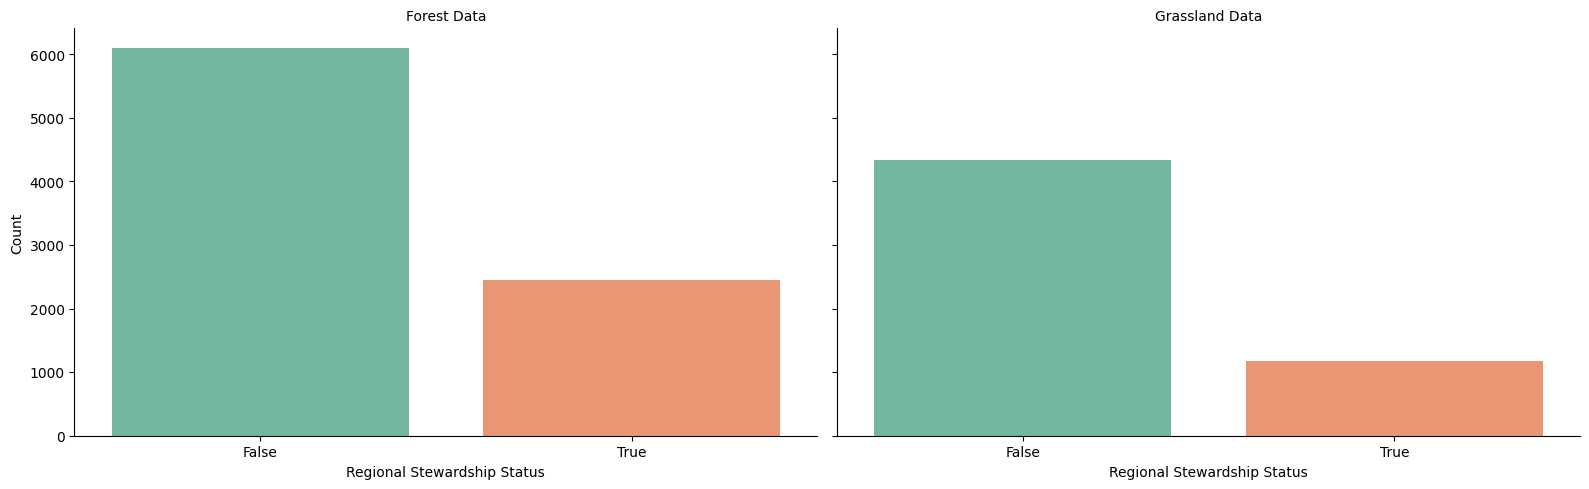

In [ ]:
# Catplot for Regional Stewardship Status split by Location_Type
g = sns.catplot(data=combined_habitat_df, x='Regional_Stewardship_Status', col='Location_Type', kind='count', height=5, aspect=1.6, palette='Set2')
g.set_axis_labels("Regional Stewardship Status", "Count")
g.set_titles("{col_name} Data")
plt.show()

This chart displays the distribution of species with 'True' and 'False' Regional Stewardship Status, separated for Forest and Grassland habitats. Here's a breakdown:

Forest Data: There's a significantly higher count of species with 'False' Regional Stewardship Status compared to 'True'. However, a substantial number of species are still marked as having 'True' Regional Stewardship Status.

Grassland Data: Similar to the forest data, there are more species with 'False' Regional Stewardship Status. Nevertheless, a considerable number of species in grasslands also have a 'True' Regional Stewardship Status.

Overall, the chart indicates that in both forest and grassland habitats, there are species considered important for regional stewardship, even if they are not on a national watchlist. The absolute counts differ between habitats, reflecting the total number of observations in each.

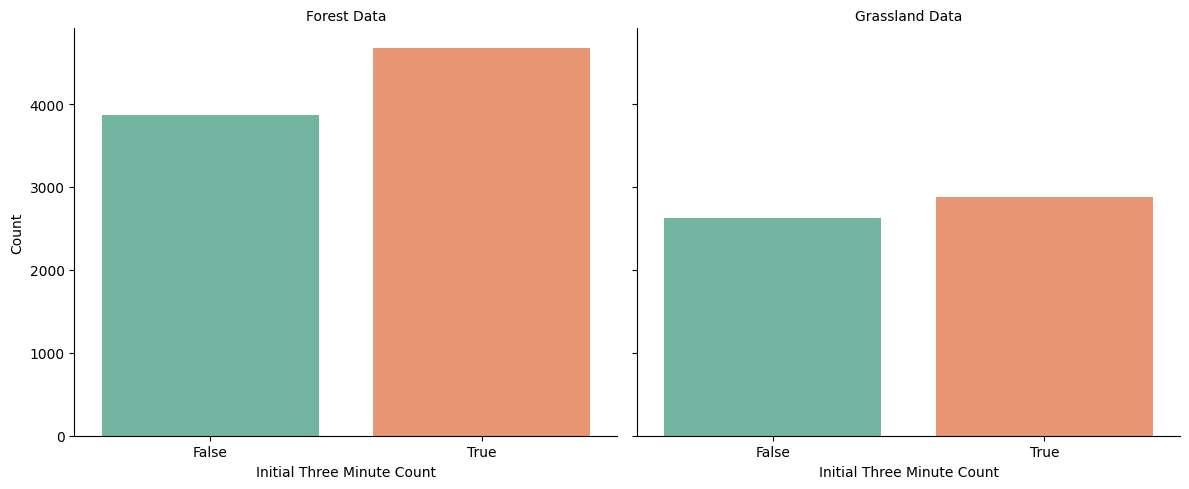

In [ ]:
# Catplot for Initial Three Minute Count split by Location_Type
g = sns.catplot(data=combined_habitat_df, x='Initial_Three_Min_Cnt', col='Location_Type', kind='count', height=5, aspect=1.2, palette='Set2')
g.set_axis_labels("Initial Three Minute Count", "Count")
g.set_titles("{col_name} Data")
plt.show()

This chart shows the distribution of observations where a bird was recorded within the initial three minutes of the survey ('True') or not ('False'), separated by Forest and Grassland habitats.

In both Forest and Grassland data, there were more instances where a bird was observed within the initial three minutes (True) compared to when it was not (False).

This suggests that a significant number of bird detections in both habitats occur relatively early in the observation period.

In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
display(combined_grassland_df.describe())


Summary Statistics for Numerical Columns:


,Sub_Unit_Code,Year,Visit,TaxonCode,Temperature,Humidity
count,0.0,5514.0,5514.000000,5514.000000,5514.000000,5514.000000
mean,NaN,2018.0,1.916757,103735.339318,24.071092,71.116558
std,NaN,0.0,0.820868,87162.610958,4.583418,13.087909
min,NaN,2018.0,1.000000,76625.000000,12.900000,32.900002
25%,NaN,2018.0,1.000000,84790.000000,21.200001,63.900002
50%,NaN,2018.0,2.000000,88296.000000,23.600000,72.300003
75%,NaN,2018.0,3.000000,94206.000000,27.000000,81.599998
max,NaN,2018.0,3.000000,926917.000000,37.299999,93.300003


Bivariate Analysis - combined dataset (Forest and grassland)

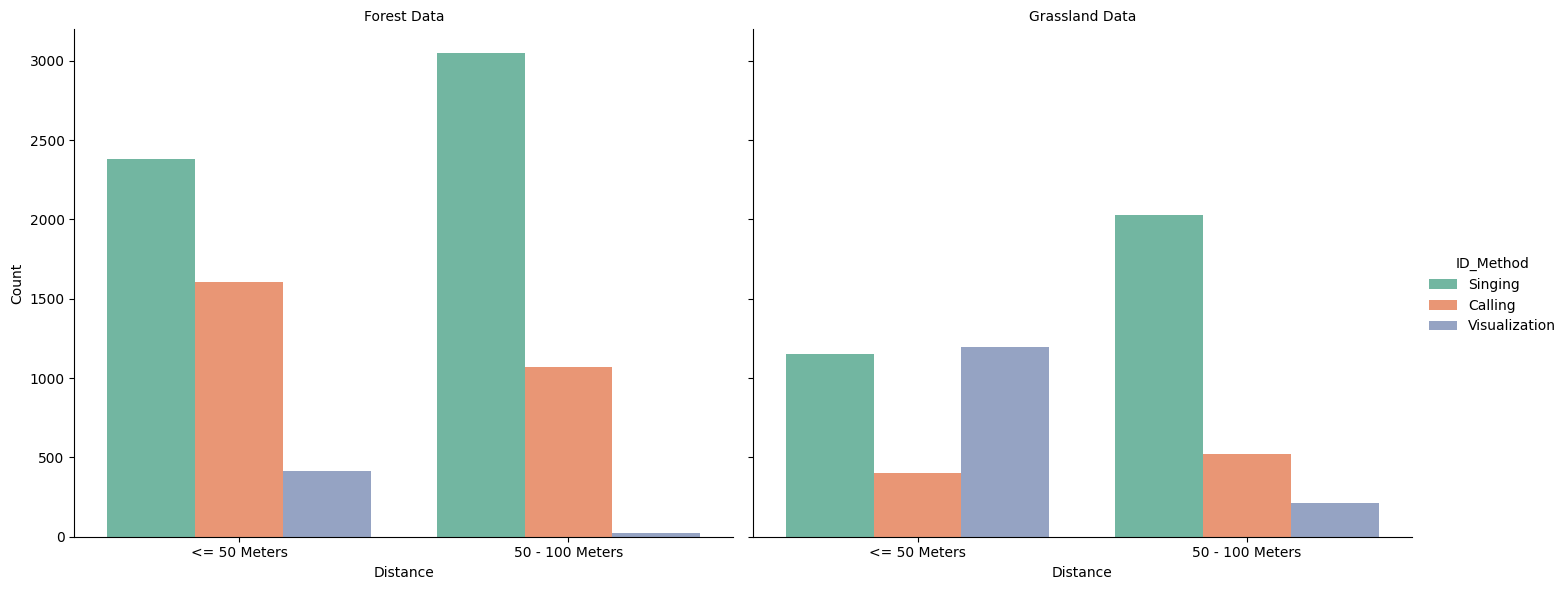

In [ ]:
# Relationship between ID_Method and Distance split by Location_Type
g = sns.catplot(data=combined_habitat_df, x='Distance', hue='ID_Method', col='Location_Type', kind='count', height=6, aspect=1.2, palette='Set2')
g.set_axis_labels("Distance", "Count")
g.set_titles("{col_name} Data")
plt.show()

This chart illustrates the relationship between the distance of observation and the identification method used, broken down by habitat type (Forest vs. Grassland).

Forest Data: For observations made at both '<= 50 Meters' and '50 - 100 Meters', 'Singing' is the most frequent identification method, followed by 'Calling', and then 'Visualization'. 'Visualization' is used less frequently at the greater distance.

Grassland Data: At '<= 50 Meters', 'Visualization' is the most frequent method, followed by 'Singing' and 'Calling'. However, at '50 - 100 Meters', 'Singing' becomes the most frequent, followed by 'Calling' and then 'Visualization'.

This comparison highlights a key difference between the habitats: while singing is important in both, visualization is more dominant for closer observations in grasslands, likely due to the more open environment allowing for better visibility.

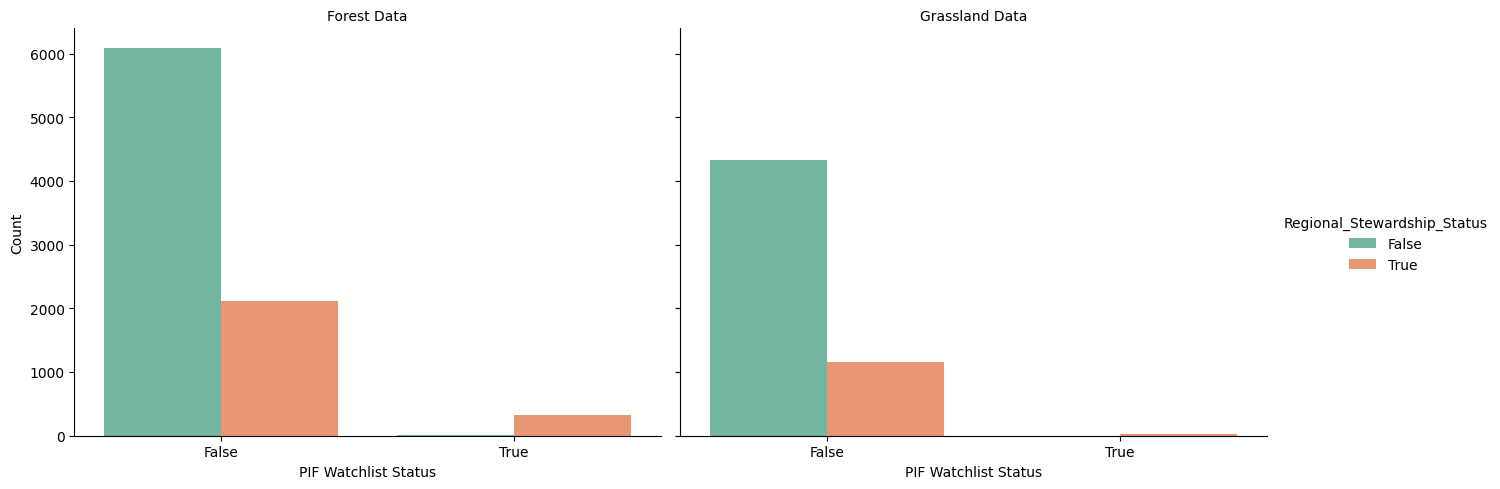

In [ ]:
# Catplot for Relationship between PIF Watchlist Status and Regional Stewardship Status split by Location_Type
g = sns.catplot(data=combined_habitat_df, x='PIF_Watchlist_Status', hue='Regional_Stewardship_Status', col='Location_Type',
                kind='count', height=5, aspect=1.3, palette='Set2')
g.set_axis_labels("PIF Watchlist Status", "Count")
g.set_titles("{col_name} Data")
plt.show()

This chart shows the relationship between a species being on the PIF Watchlist and having a True Regional Stewardship Status, separated by habitat type (Forest vs. Grassland).

Forest Data: Among species not on the PIF Watchlist ('False'), a large number have a 'False' Regional Stewardship Status, but a significant portion still have a 'True' Regional Stewardship Status. Among species on the PIF Watchlist ('True'), a smaller number are observed, but a notable proportion of these do have a 'True' Regional Stewardship Status.

Grassland Data: Similar to the forest data, among species not on the PIF Watchlist ('False'), a large number have a 'False' Regional Stewardship Status, but a significant portion still have a 'True' Regional Stewardship Status. Among species on the PIF Watchlist ('True'), the number of observations is very small, but there are some instances of these species having a 'True' Regional Stewardship Status.

This indicates that in both forest and grassland habitats, regional conservation priorities include species not exclusively on the national PIF Watchlist.


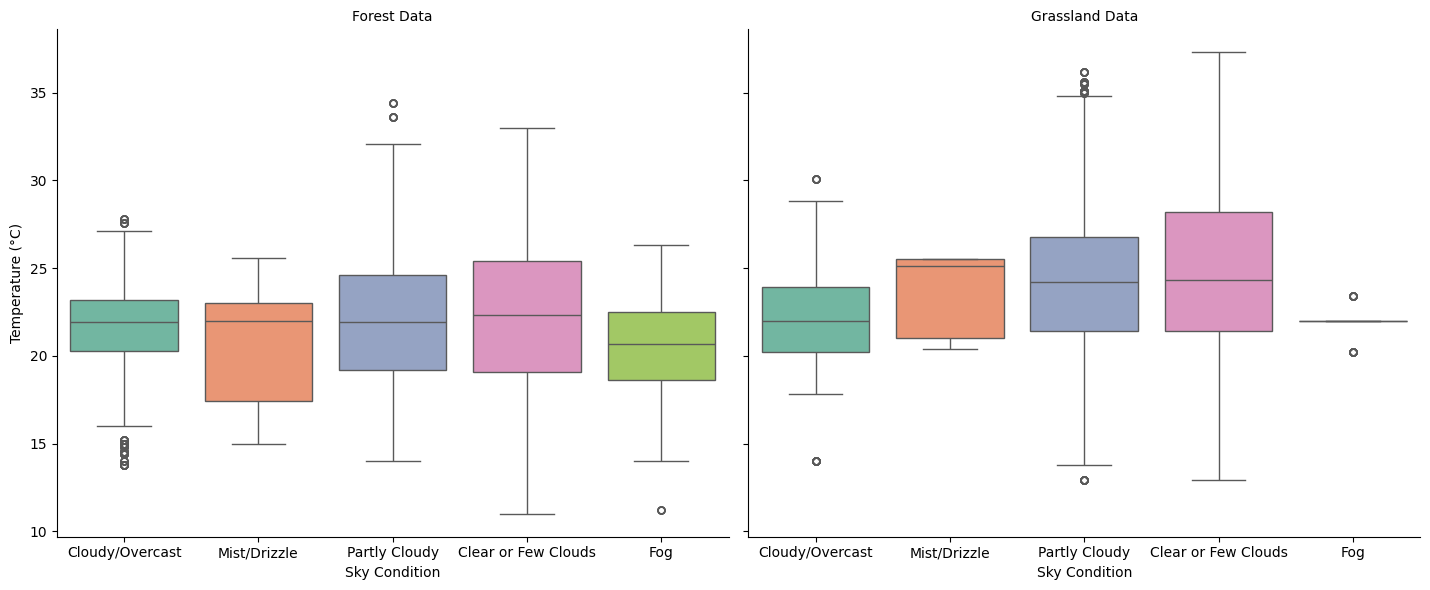

In [ ]:
# Catplot for Relationship between Sky and Temperature split by Location_Type
g = sns.catplot(data=combined_habitat_df, x='Sky', y='Temperature', col='Location_Type', kind='box',
    height=6, aspect=1.2, palette='Set2')
g.set_axis_labels("Sky Condition", "Temperature (°C)")
g.set_titles("{col_name} Data")
plt.show()

This box plot shows the distribution of temperature for different sky conditions, separated by habitat type (Forest vs. Grassland).

Forest Data: Temperatures tend to be slightly higher on average during 'Partly Cloudy' and 'Clear or Few Clouds' conditions compared to 'Cloudy/Overcast', 'Mist/Drizzle', and 'Fog'. There is a wider range of temperatures observed during 'Partly Cloudy' and 'Clear or Few Clouds' days. 'Mist/Drizzle' and 'Fog' conditions appear to be associated with cooler and less variable temperatures.

Grassland Data: Temperatures appear to be generally higher in grasslands compared to forests, especially during 'Partly Cloudy' and 'Clear or Few Clouds' conditions, which show a wider temperature range and higher median temperatures. 'Cloudy/Overcast' and 'Mist/Drizzle' conditions are associated with slightly lower temperatures and less variability.

This suggests that sky conditions influence temperature in both habitats, with clearer conditions generally being warmer. There also appears to be a difference in overall temperature ranges between the two habitats during the observation period.

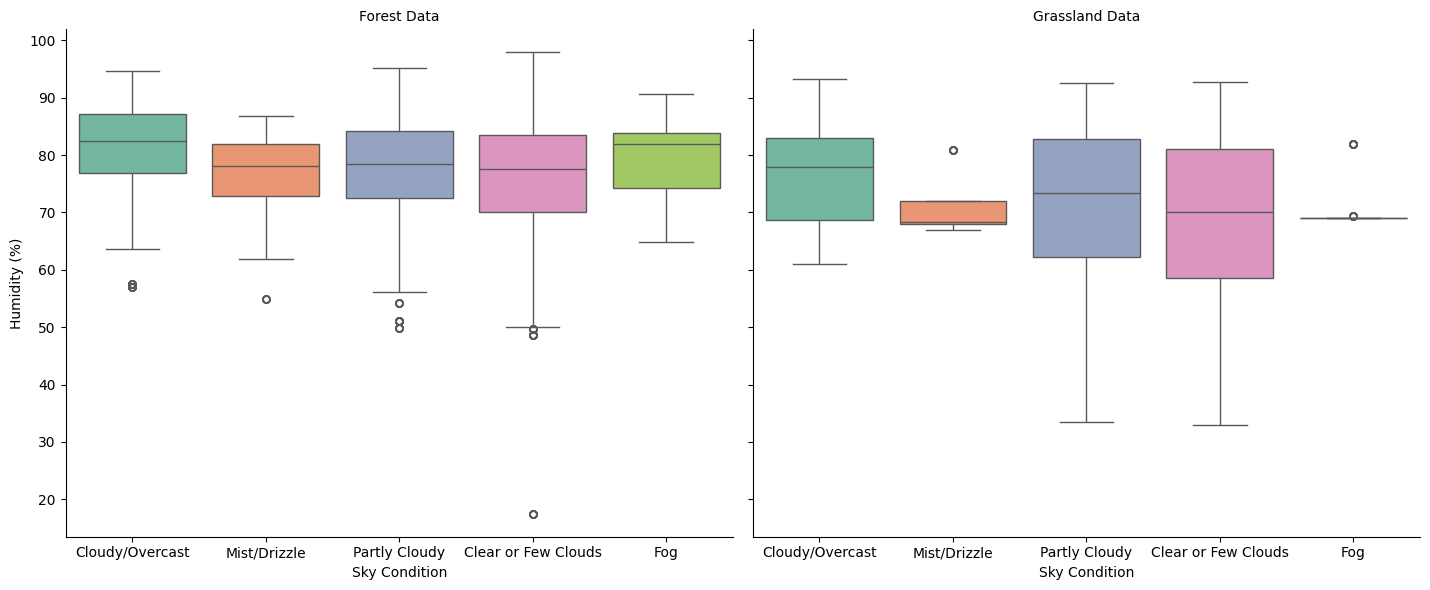

In [ ]:
# Catplot for Relationship between Sky and Humidity split by Location_Type
g = sns.catplot(data=combined_habitat_df, x='Sky', y='Humidity', col='Location_Type', kind='box', height=6, aspect=1.2, palette='Set2')
g.set_axis_labels("Sky Condition", "Humidity (%)")
g.set_titles("{col_name} Data")
plt.show()

This box plot shows the distribution of humidity levels for different sky conditions, separated by habitat type (Forest vs. Grassland).

Forest Data: 'Cloudy/Overcast', 'Mist/Drizzle', and 'Fog' conditions are generally associated with higher median humidity levels, similar to the grassland data. 'Partly Cloudy' and 'Clear or Few Clouds' conditions show slightly lower median humidity levels and wider interquartile ranges, indicating more variability in humidity.

Grassland Data: 'Cloudy/Overcast', 'Mist/Drizzle', and 'Fog' conditions are generally associated with higher median humidity levels, similar to the forest data. 'Partly Cloudy' and 'Clear or Few Clouds' conditions tend to have slightly lower median humidity and more variability.

This suggests that sky conditions are related to humidity levels in both habitats, with more clouded or misty conditions corresponding to higher and less variable humidity. The overall humidity might be lower in grasslands during the observation period compared to forests.

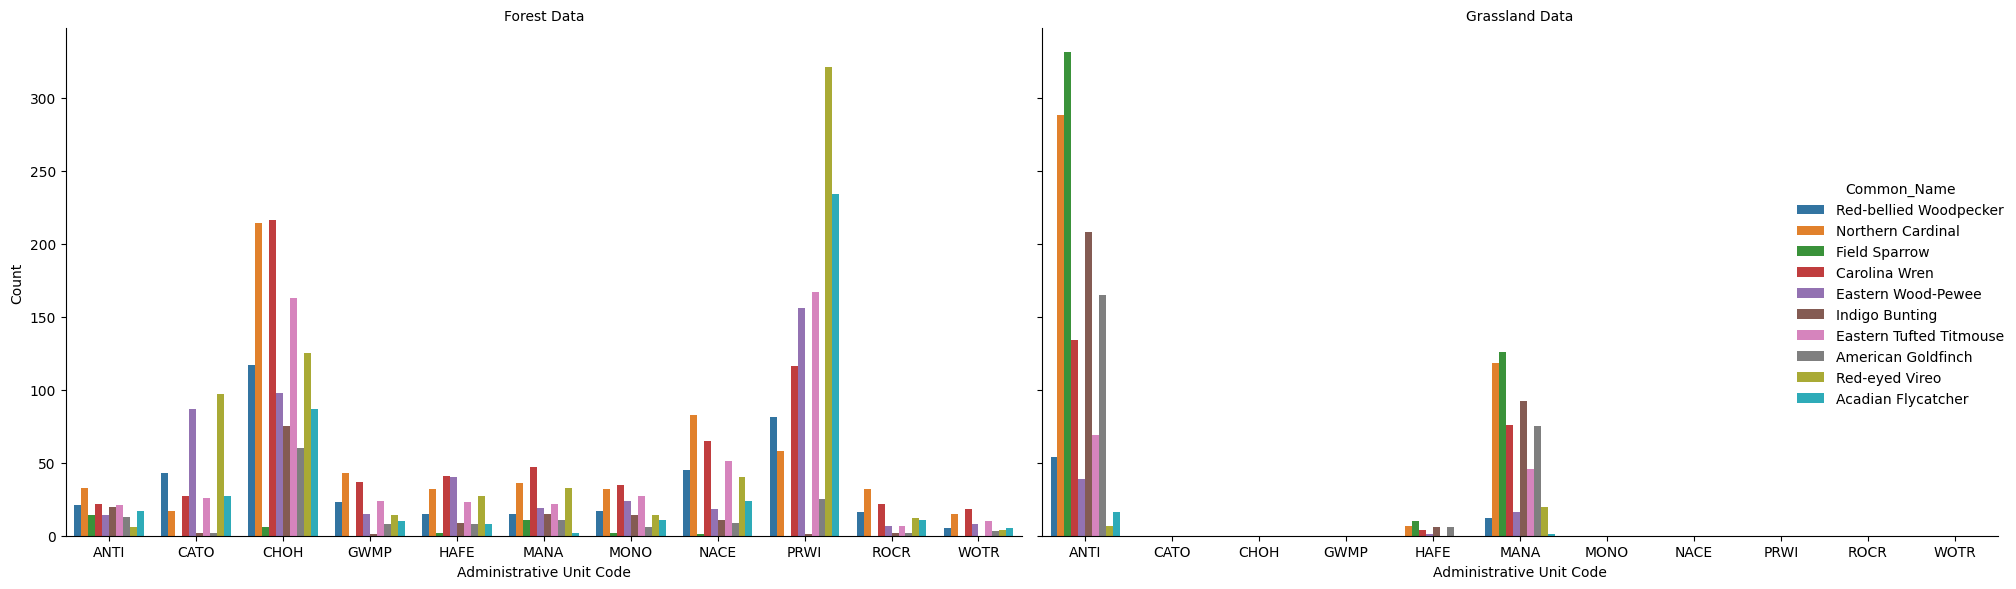

In [ ]:
# Get top 10 species overall (both habitats)
top_common_names = combined_habitat_df['Common_Name'].value_counts().nlargest(10).index

# Filter only those species
top_species_df = combined_habitat_df[combined_habitat_df['Common_Name'].isin(top_common_names)]

# Catplot for top species by Admin Unit Code split by Location_Type
g = sns.catplot(data=top_species_df, x='Admin_Unit_Code', hue='Common_Name', col='Location_Type', kind='count', height=6, aspect=1.5, palette='tab10')
g.set_axis_labels("Administrative Unit Code", "Count")
g.set_titles("{col_name} Data")
plt.tight_layout()
plt.show()

This chart shows the distribution of the top 10 most frequently observed bird species across the different administrative units, separated by habitat type (Forest vs. Grassland).

You can see which administrative units in each habitat have the highest overall counts of these top species. For example, in the Forest data, PRWI and CHOH have high counts for several species, while in the Grassland data, ANTI and MANA stand out.

It highlights which species are most common in each administrative unit within each habitat. Some species are prevalent in certain units but less so in others, indicating potential habitat preferences or regional distribution patterns.

The chart allows for a visual comparison of the relative abundance of the top 10 species across different administrative units and between the two habitats.

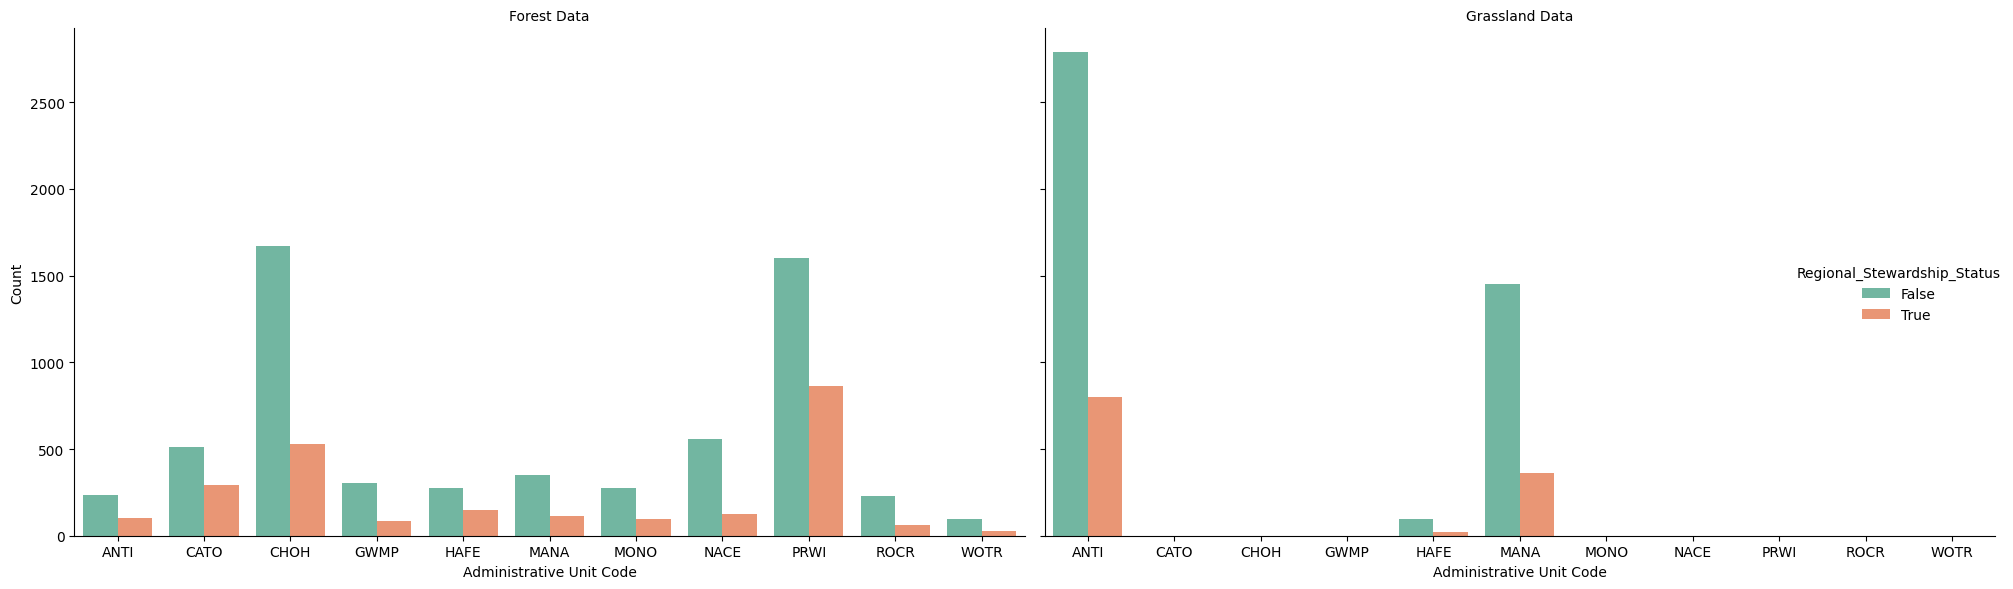

In [ ]:
# Catplot for Regional Stewardship Status across Admin Unit Code split by Location_Type
g = sns.catplot(data=combined_habitat_df, x='Admin_Unit_Code', hue='Regional_Stewardship_Status', col='Location_Type', kind='count', height=6, aspect=1.5, palette='Set2')
g.set_axis_labels("Administrative Unit Code", "Count")
g.set_titles("{col_name} Data")
plt.tight_layout()
plt.show()

This chart shows the distribution of species with 'True' and 'False' Regional Stewardship Status across the different administrative units, separated by habitat type (Forest vs. Grassland).

Some administrative units, like CHOH and PRWI in the Forest data, and ANTI and MANA in the Grassland data, have a significantly higher number of observations overall, including both 'True' and 'False' regional stewardship statuses.

Within most administrative units, the number of species with 'False' Regional Stewardship Status is higher than those with 'True'.

However, the proportion of species with 'True' Regional Stewardship Status varies across units and between habitats. Some units might have a higher percentage of regionally important species even if their total observation count is lower.

This visualization helps to pinpoint which administrative units are particularly important for regional conservation efforts based on the observed bird species within each habitat.

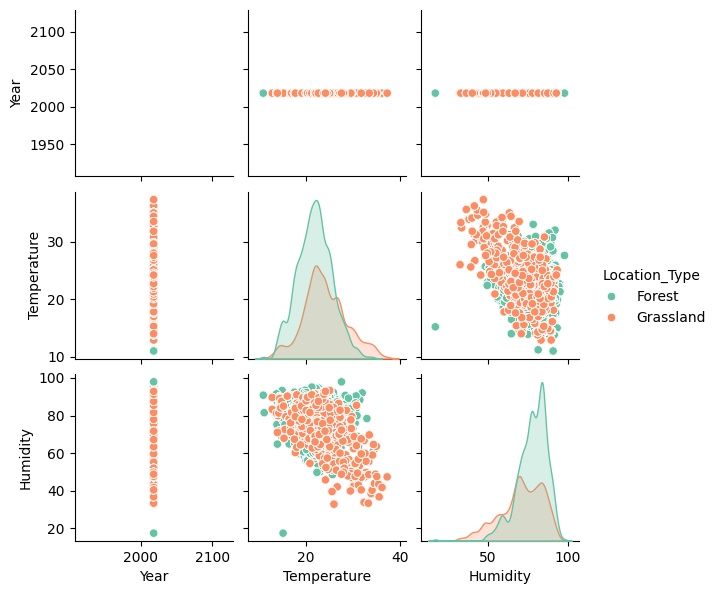

In [ ]:
# Select only numeric columns for the pairplot
numeric_cols = combined_habitat_df.select_dtypes(include=['number']).columns

# Pairplot with hue for Location_Type (Forest / Grassland)
sns.pairplot(combined_habitat_df, vars=numeric_cols, hue='Location_Type', palette='Set2', diag_kind='kde', height=2)

plt.show()

This pairplot visualizes the relationships between the numerical variables ('Year', 'Temperature', and 'Humidity') in your combined dataset, with points colored by 'Location_Type' (Forest or Grassland).

Year: As expected, the 'Year' column shows a single value (2018) for all observations in both habitats

Temperature vs. Humidity: This scatter plot shows a negative correlation between Temperature and Humidity, meaning that as temperature increases, humidity tends to decrease, and vice versa. You can also observe that the temperature range in Grassland (orange points) appears to be slightly higher than in Forest (teal points), while humidity in Forest seems to be slightly higher than in Grassland

Distribution of Temperature and Humidity: The diagonal plots show the distribution of each numerical variable. The KDE plots (the shaded areas) for Temperature and Humidity are split by 'Location_Type', visually confirming the slight differences in their distributions between Forest and Grassland.

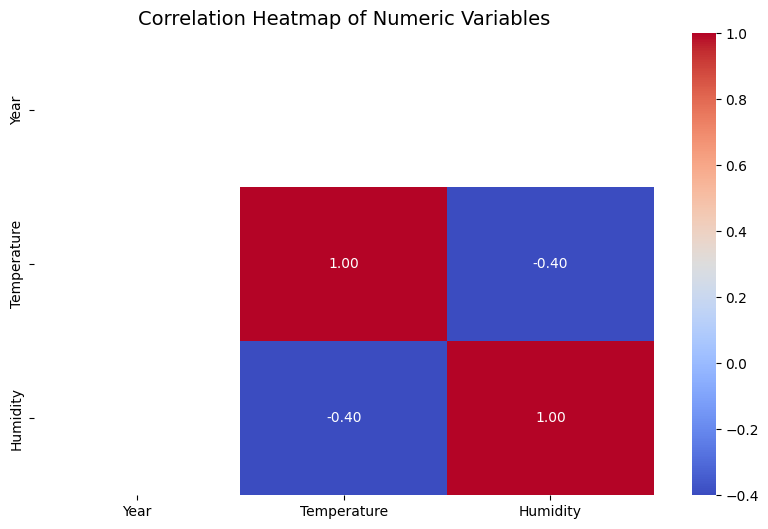

In [ ]:
# Select numeric columns only
numeric_df = combined_habitat_df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=14)
plt.show()

The heatmap shows a correlation coefficient of -0.40 between 'Temperature' and 'Humidity'. This confirms the moderate negative linear relationship observed in the pairplot: as temperature increases, humidity tends to decrease.

Year with other variables: The 'Year' column shows correlation coefficients close to 0 with 'Temperature' and 'Humidity', which is expected since all observations are from the same year.

These visualizations collectively show the relationship between temperature and humidity in your dataset and highlight some minor differences in the distribution of these variables between the forest and grassland habitats.

Overall Data Characteristics:

The dataset contains bird observation data exclusively from forest and grassland habitats collected in the year 2018.
There were a significant number of observations where the sex of the bird was not determined ('Undetermined' or 'NA') in both habitats.
Most observations in both habitats were made at a distance of 50 meters or less.
Habitat-Specific Insights:

Forests: 'Singing' and 'Calling' were the dominant identification methods, effective across both close and further distances. Visualization was used less frequently, especially at greater distances.

Grasslands: While 'Singing' was the most frequent method overall, 'Visualization' was the most common method for closer observations (<= 50 meters), likely due to the more open environment. 'Calling' was used less frequently than singing and visualization.

Temperatures during observations appeared to be generally higher in grasslands compared to forests, especially during clearer sky conditions.
Humidity levels during observations seemed to be slightly lower in grasslands compared to forests.

Conservation Status Insights:

In both forest and grassland habitats, the majority of observed species are not on the national PIF Watchlist.
However, a notable number of observed species in both habitats are considered important for regional conservation efforts, as indicated by the 'True' Regional Stewardship Status.

The distribution of regionally important species varies across the different administrative units within both forest and grassland habitats, highlighting areas of particular conservation significance.
Environmental Factors and Observations:

Sky conditions are related to temperature and humidity in both habitats. Clearer conditions are generally warmer and less humid, while cloudy or misty conditions are associated with higher humidity and cooler temperatures.
A significant proportion of bird detections in both habitats occurred within the initial three minutes of the observation session.

Numerical Relationships:

There is a moderate negative correlation between Temperature and Humidity in the combined dataset, meaning that as temperature increases, humidity tends to decrease.
These insights provide a good overview of the data, highlighting differences and similarities between the habitats, the effectiveness of different identification methods, and the importance of considering regional conservation status.